# HOUSE PRICE PREDICTION

### CHARGEMENT DES PACKAGES

In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [9]:
# Importation des donnees

df = pd.read_csv("data.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [19]:
# Définir le répertoire de travail de manière référentielle
def set_working_directory():
   
    # Obtenir le chemin absolu du notebook courant
    notebook_path = os.path.abspath('.')
    
    # Définir le répertoire racine du projet 
    # (en remontant d'un ou plusieurs niveaux si nécessaire)
    project_root = os.path.dirname(notebook_path)
    
    # Définir les sous-répertoires
    data_dir = os.path.join(project_root, 'inputdata')
    output_dir = os.path.join(project_root, 'outputdata')
    
    # Créer les répertoires s'ils n'existent pas
    #os.makedirs(data_dir, exist_ok=True)
    #os.makedirs(output_dir, exist_ok=True)
    
    return {
        'project_root': project_root,
        'data_dir': data_dir,
        'output_dir': output_dir
    }


In [16]:
dirs  = set_working_directory()
print('project_root : ', dirs['project_root'],'data_dir : ', dirs['data_dir'], 'output_dir : ', dirs['output_dir'])

project_root :  c:\Users\Larry\Desktop\ISE 2\S1\Machine Learning\Projet data_dir :  c:\Users\Larry\Desktop\ISE 2\S1\Machine Learning\Projet\inputdata output_dir :  c:\Users\Larry\Desktop\ISE 2\S1\Machine Learning\Projet\outputdata


In [20]:
# Fonction pour charger et séparer les données
def prepare_data(file_path, test_size=0.2, random_state=42):

    # Charger les données
    data = pd.read_csv(file_path, na_values=['NA', 'N/A', 'null', ''],keep_default_na=False)
    
    # Séparer les features et la target
    X = data.drop('SalePrice', axis=1)  # Remplacez 'target' par votre colonne cible
    y = data['SalePrice']
    
    # Séparer en données d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

In [21]:
data_file_path = os.path.join(dirs['data_dir'], 'data.csv')

# Préparer les données
X_train, X_test, y_train, y_test = prepare_data(data_file_path)

# Quelques informations sur les jeux de données
print("Taille des données d'entraînement:", X_train.shape)
print("Taille des données de test:", X_test.shape)

Taille des données d'entraînement: (1168, 80)
Taille des données de test: (292, 80)


In [23]:
df = X_train

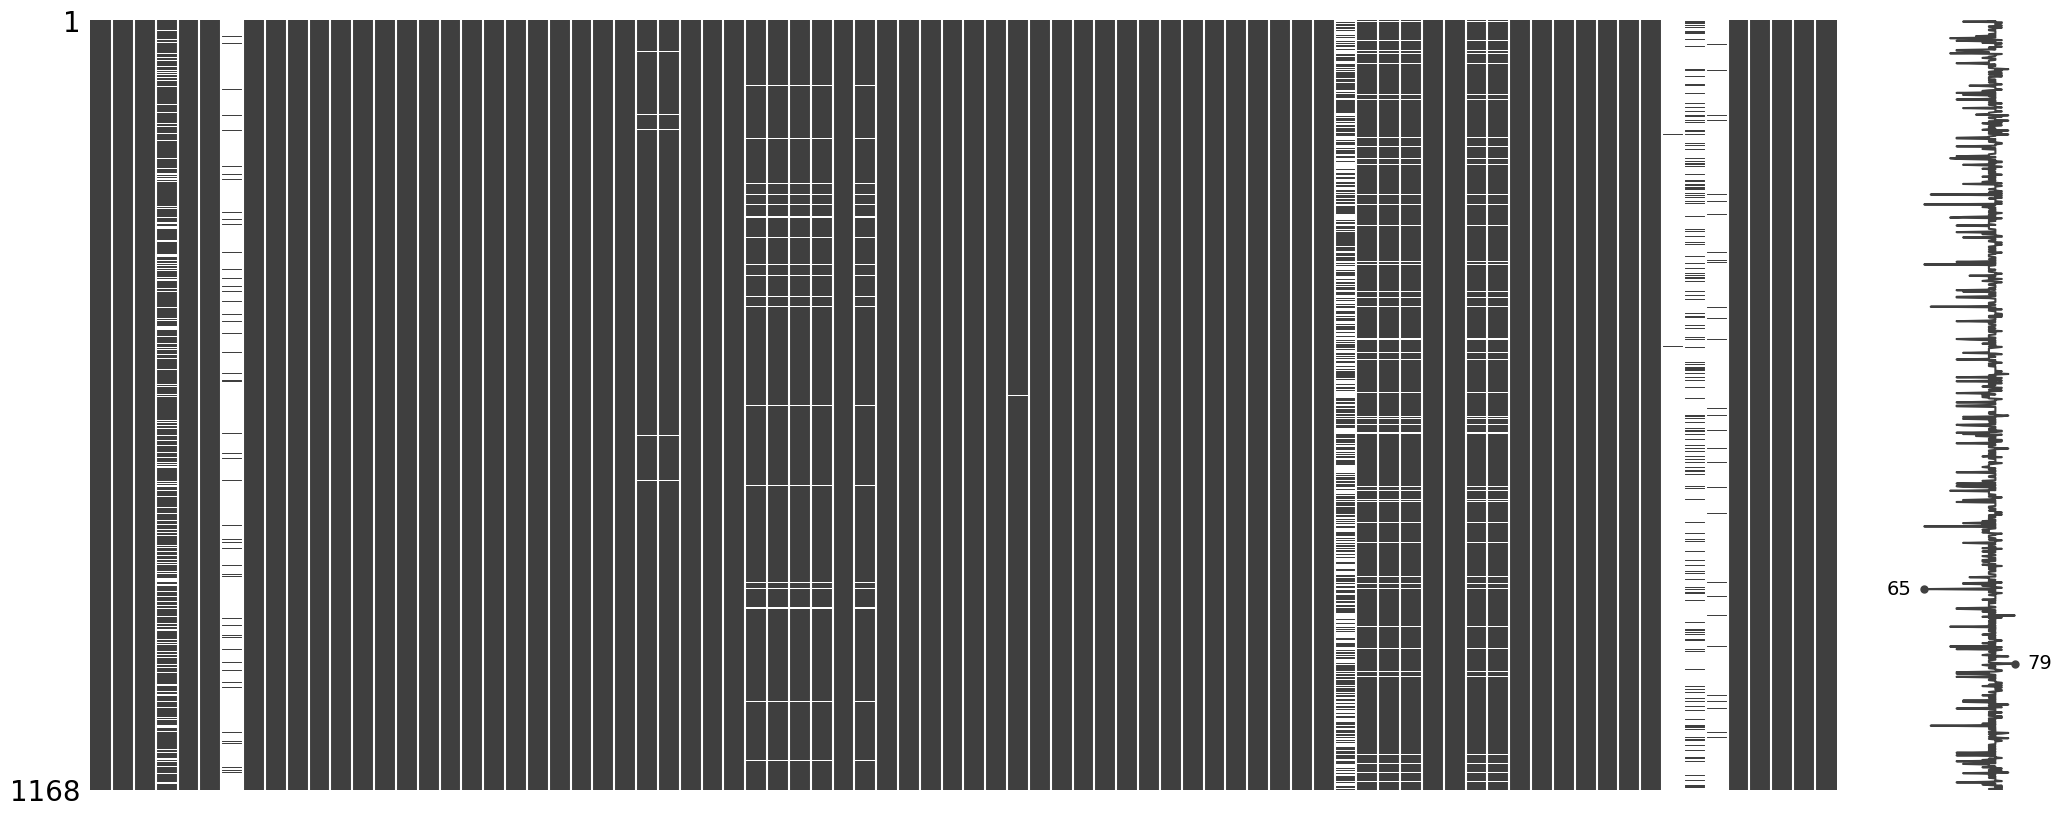

In [24]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(df)
plt.show()

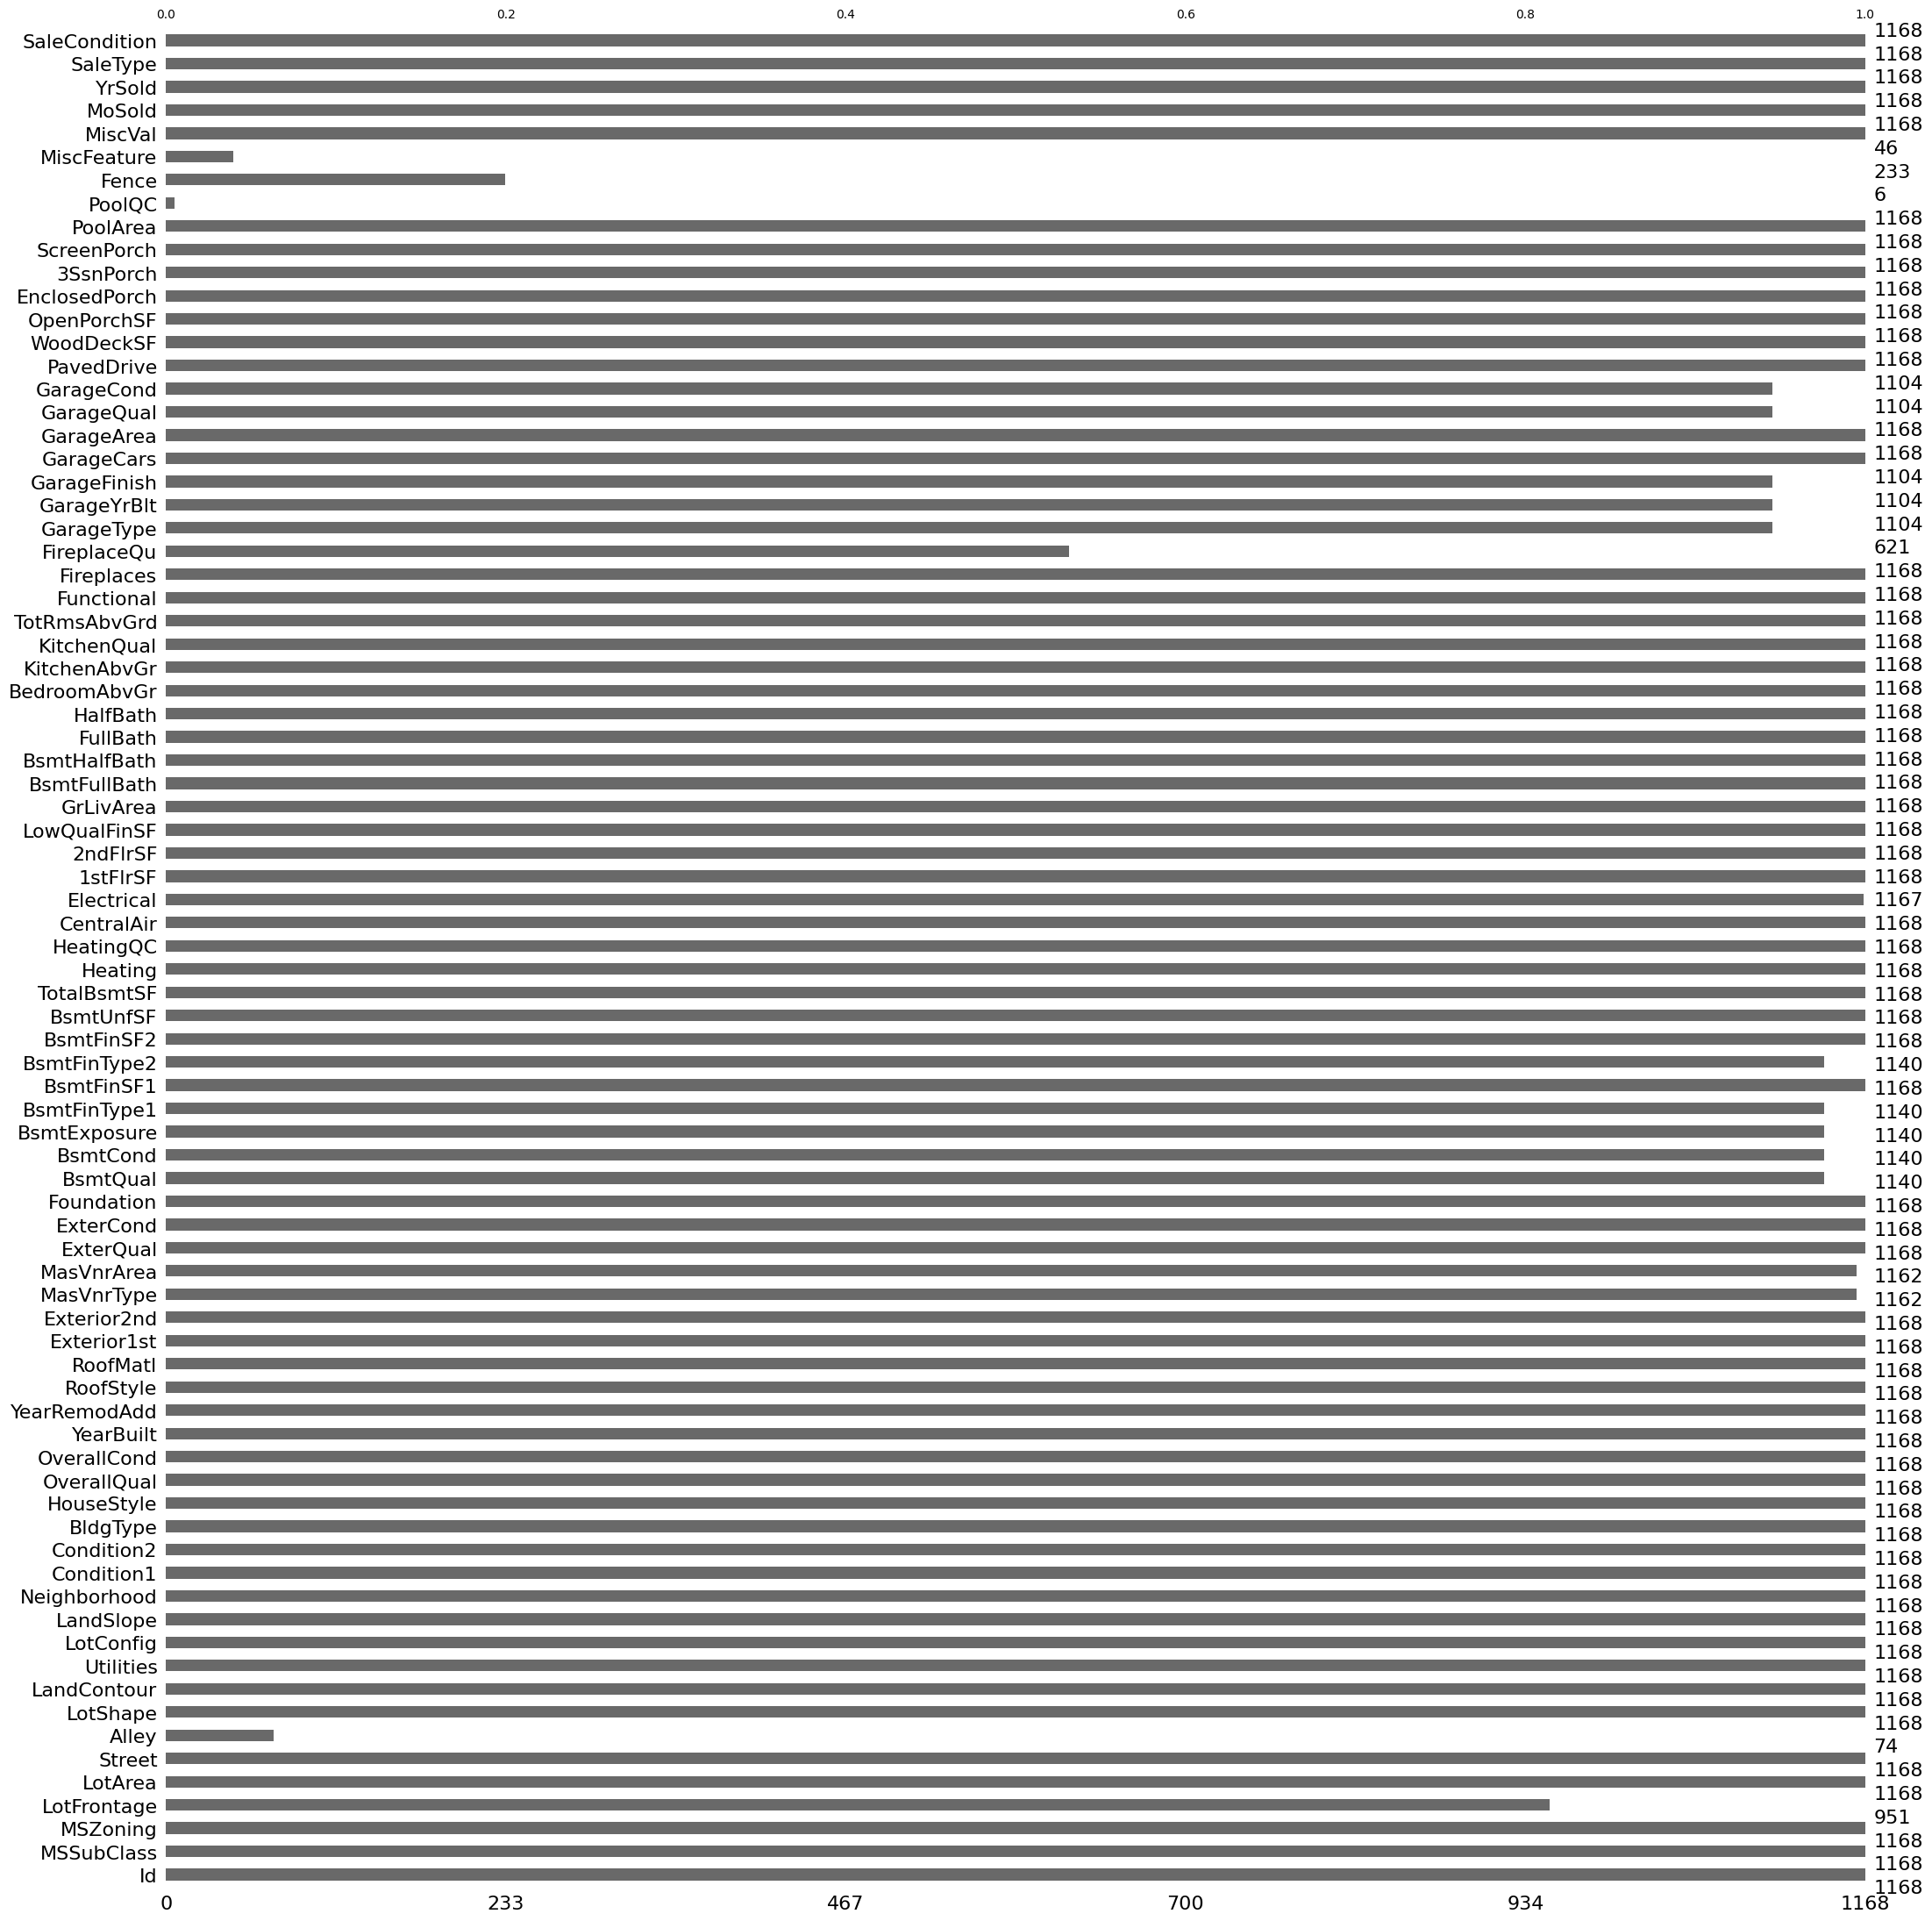

In [25]:
# Graphique des valeurs manquantes
msno.bar(df)
plt.show()

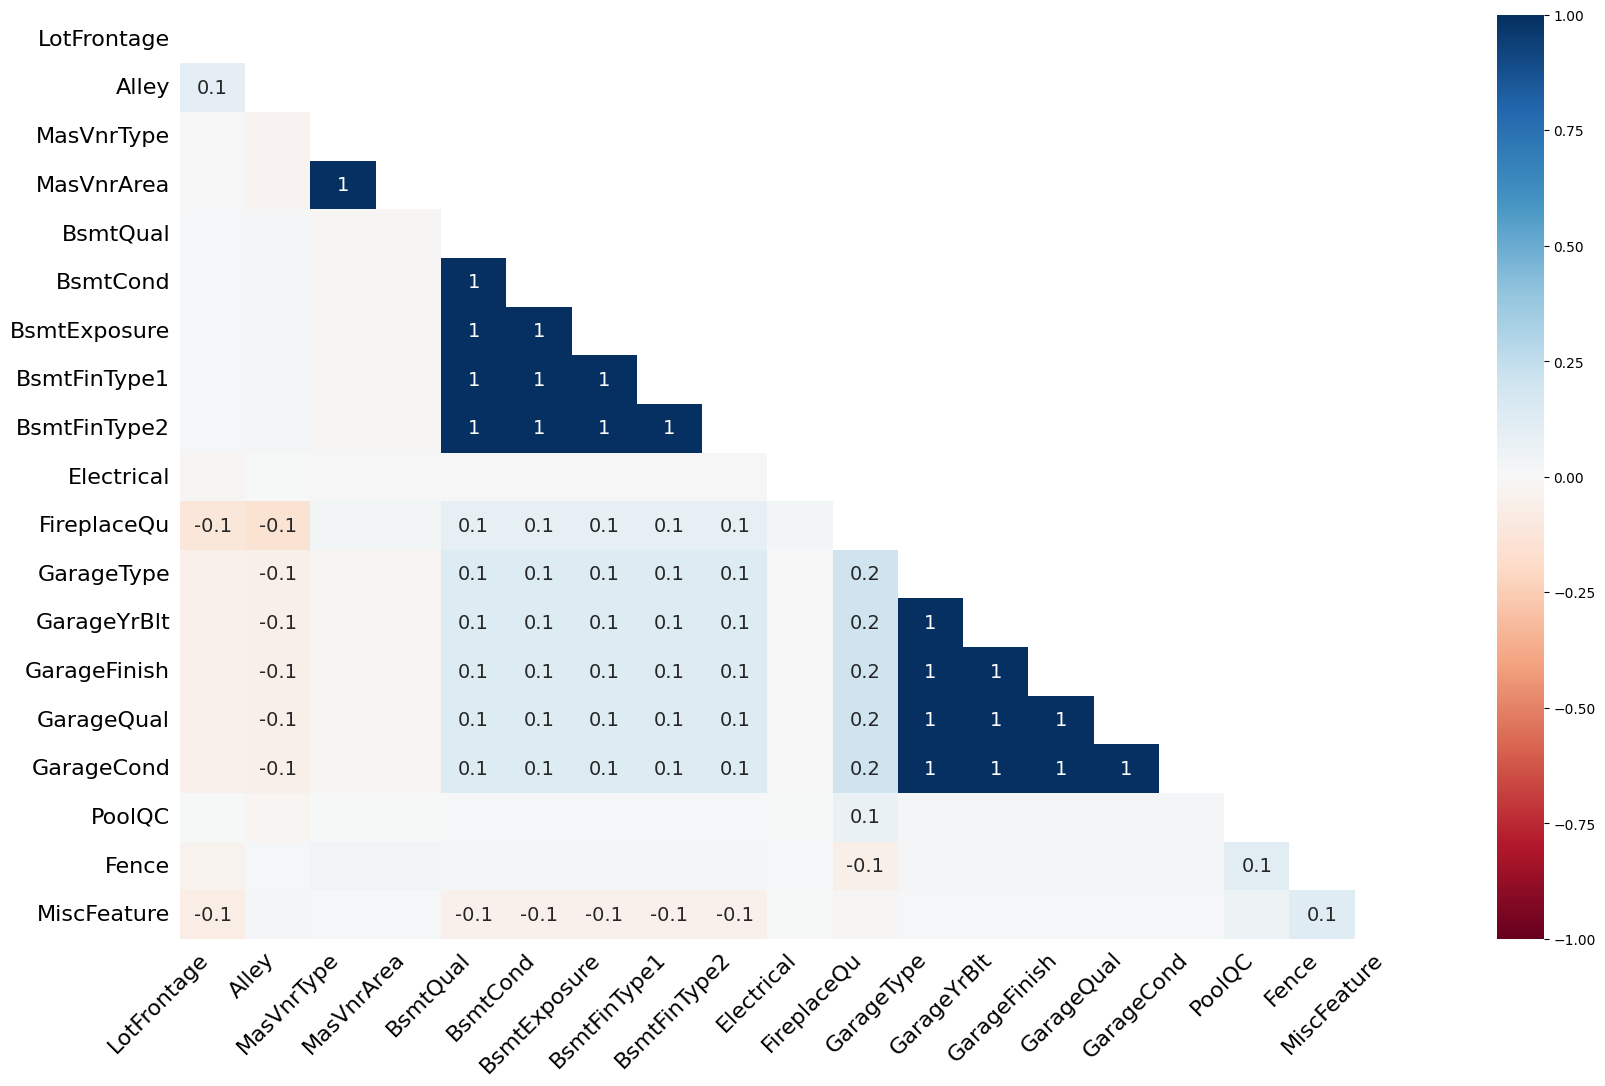

In [26]:
# Correlation des valeurs manquantes
msno.heatmap(df)
plt.show()

On constate que les valeurs manquantes concernant les caracteristiques du sous sol et ceux concernant le garage sont liees chacunes entre elles.

In [27]:
# Tableau des valeurs manquantes par colonne

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

missing_table_non_null = missing_table[missing_table['Percentage'] > 0]
print(missing_table_non_null)

              Missing Values  Percentage
LotFrontage              217   18.578767
Alley                   1094   93.664384
MasVnrType                 6    0.513699
MasVnrArea                 6    0.513699
BsmtQual                  28    2.397260
BsmtCond                  28    2.397260
BsmtExposure              28    2.397260
BsmtFinType1              28    2.397260
BsmtFinType2              28    2.397260
Electrical                 1    0.085616
FireplaceQu              547   46.832192
GarageType                64    5.479452
GarageYrBlt               64    5.479452
GarageFinish              64    5.479452
GarageQual                64    5.479452
GarageCond                64    5.479452
PoolQC                  1162   99.486301
Fence                    935   80.051370
MiscFeature             1122   96.061644


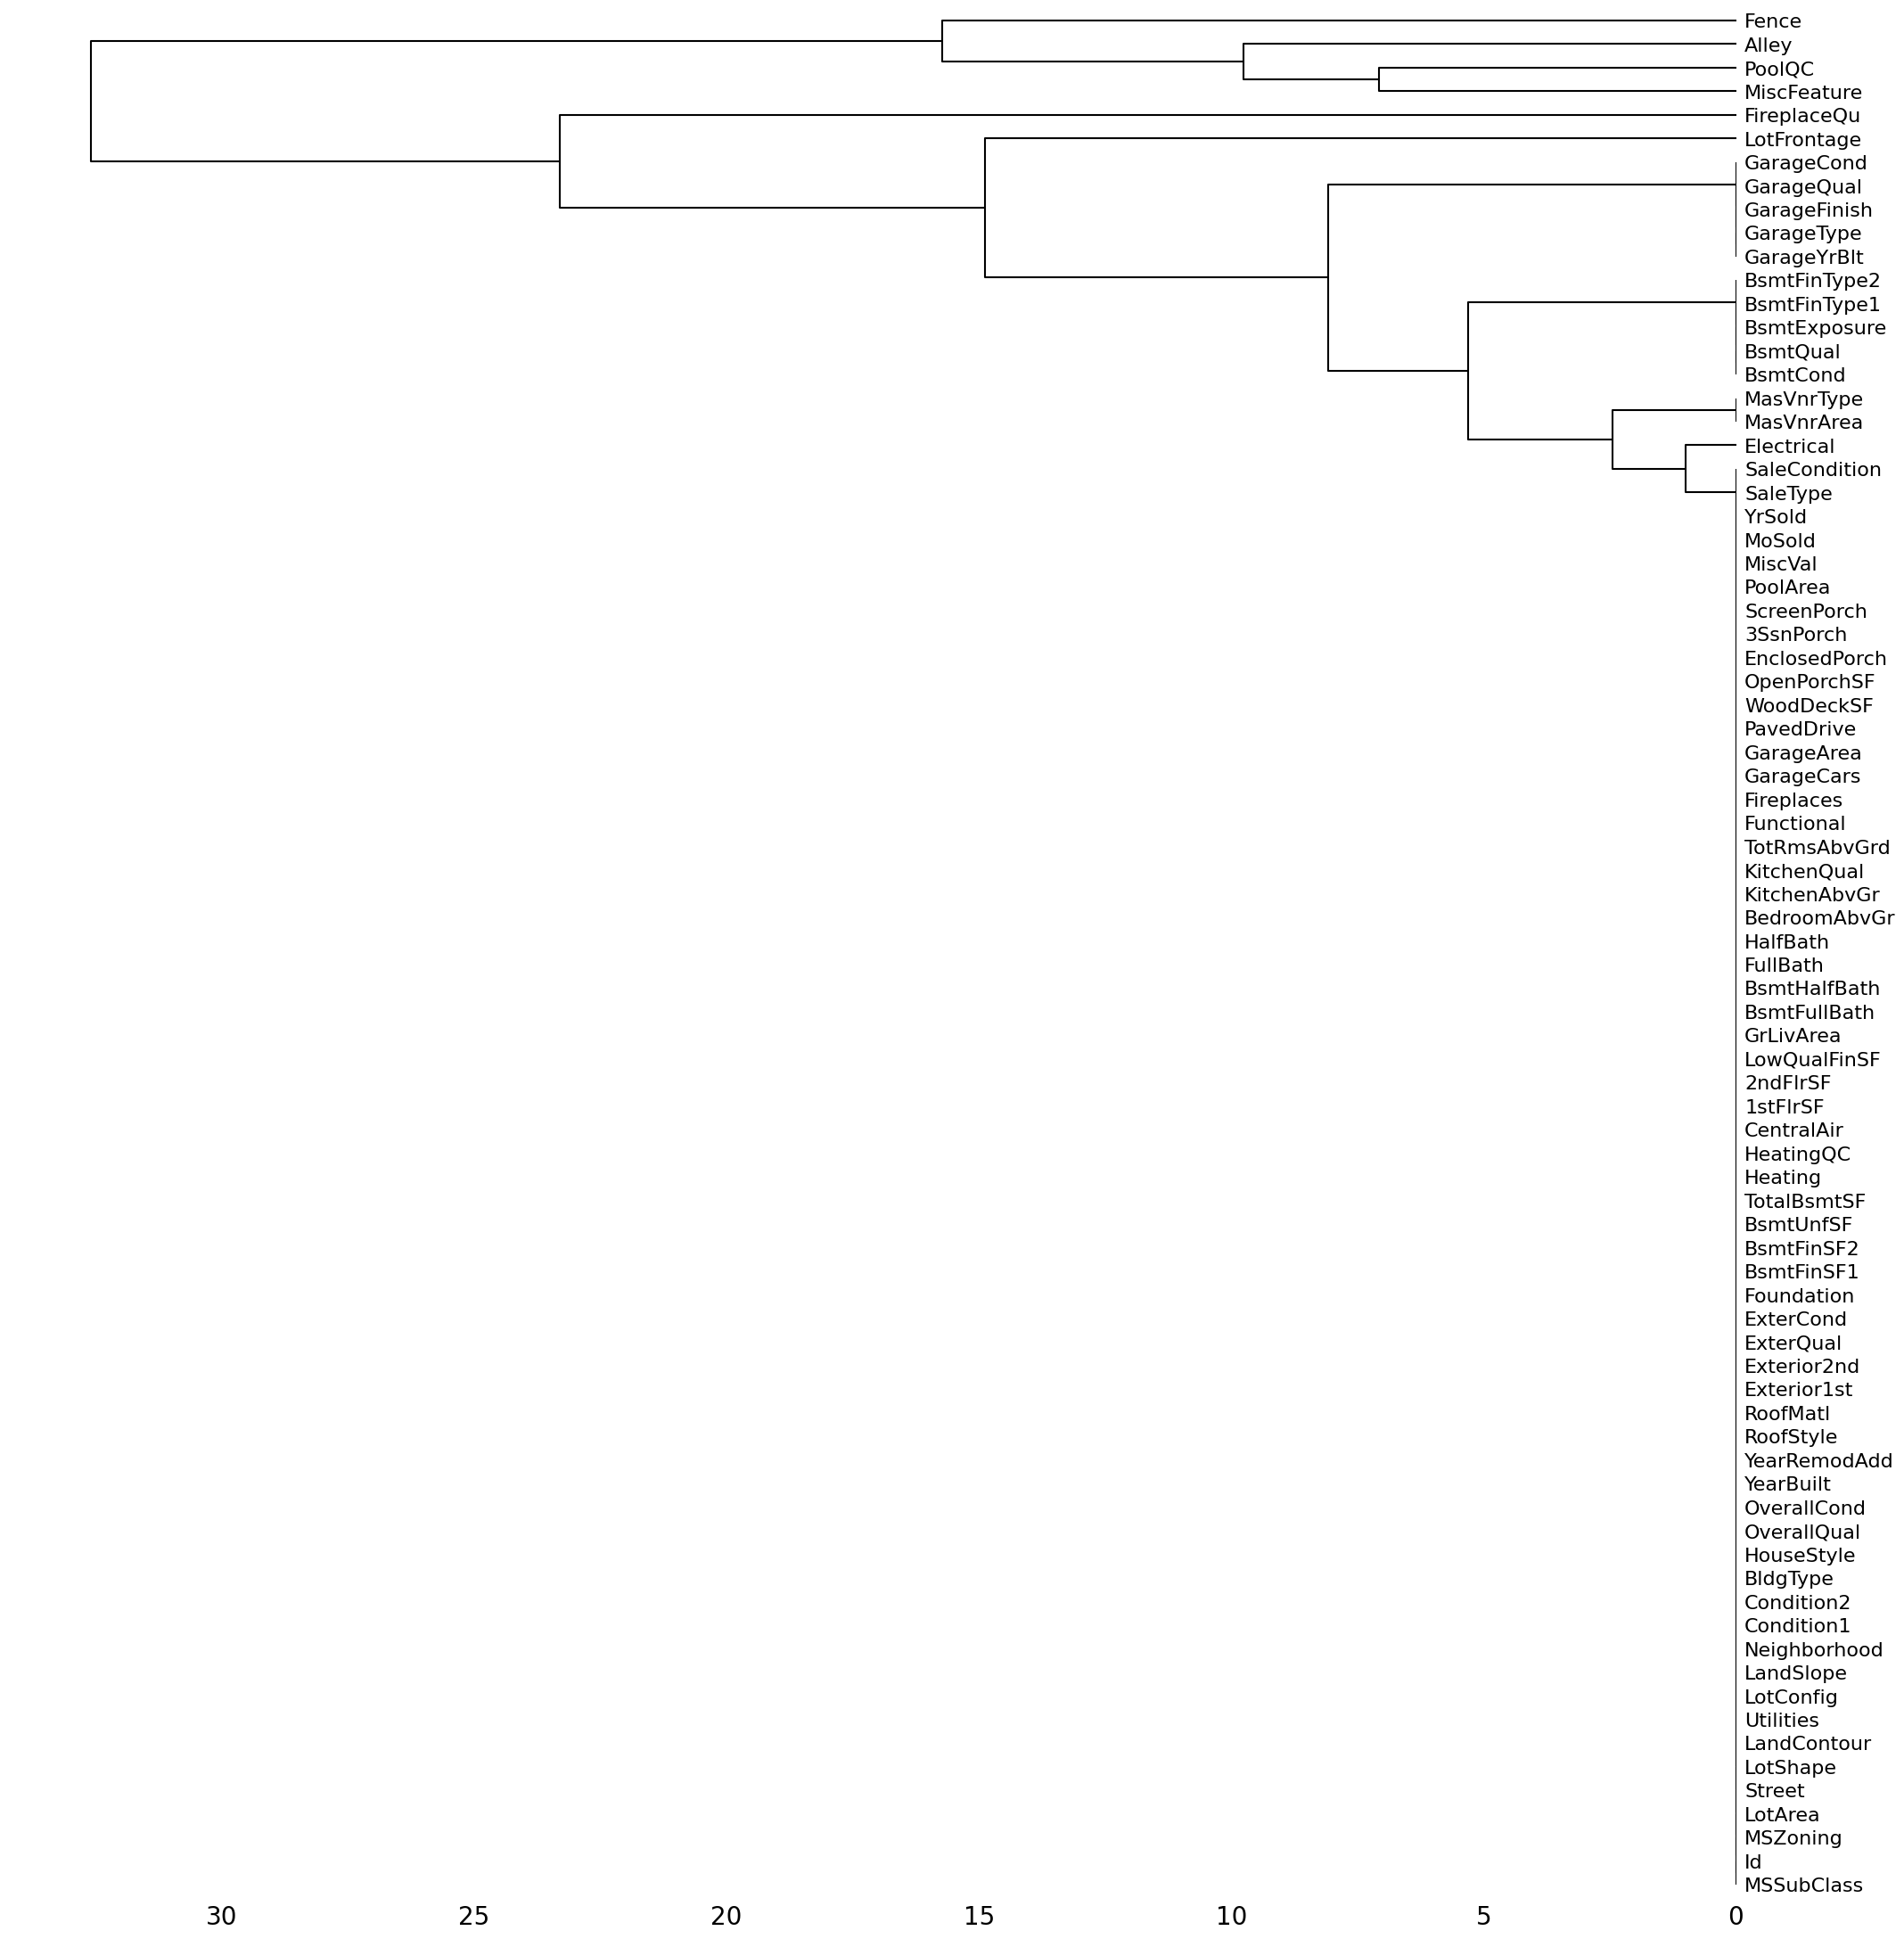

In [28]:
# Visualisation de la corrélation entre les valeurs manquantes

msno.dendrogram(df)
plt.show()

# Partie Larry

## Extraction du dataframe

In [62]:
var_Larry = ['Id','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'Exterior1st', 'Exterior2nd']

In [63]:
# Mon dataframe
df_Larry = df[var_Larry]
df_Larry

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,Exterior1st,Exterior2nd
254,255,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,MetalSd,MetalSd
1066,1067,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,VinylSd,VinylSd
638,639,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,MetalSd,Wd Sdng
799,800,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,Wd Sdng,Wd Sdng
380,381,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,BrkFace,Wd Sdng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,VinylSd,VinylSd
1130,1131,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,WdShing,Plywood
1294,1295,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,WdShing,Plywood
860,861,Detchd,1925.0,Unf,1,216,TA,TA,Y,0,240,0,0,0,0,NaN,GdPrv,Wd Sdng,Wd Sdng


In [73]:
df_Larry = df_Larry.copy()
df_Larry['SalePrice'] = y_train

In [74]:
df_Larry.head()

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,Exterior1st,Exterior2nd,SalePrice
254,255,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,MetalSd,MetalSd,145000
1066,1067,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,VinylSd,VinylSd,178000
638,639,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,MetalSd,Wd Sdng,85000
799,800,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,Wd Sdng,Wd Sdng,175000
380,381,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,BrkFace,Wd Sdng,127000


In [75]:
df_Larry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   GarageType     1104 non-null   object 
 2   GarageYrBlt    1104 non-null   float64
 3   GarageFinish   1104 non-null   object 
 4   GarageCars     1168 non-null   int64  
 5   GarageArea     1168 non-null   int64  
 6   GarageQual     1104 non-null   object 
 7   GarageCond     1104 non-null   object 
 8   PavedDrive     1168 non-null   object 
 9   WoodDeckSF     1168 non-null   int64  
 10  OpenPorchSF    1168 non-null   int64  
 11  EnclosedPorch  1168 non-null   int64  
 12  3SsnPorch      1168 non-null   int64  
 13  ScreenPorch    1168 non-null   int64  
 14  PoolArea       1168 non-null   int64  
 15  PoolQC         6 non-null      object 
 16  Fence          233 non-null    object 
 17  Exterior1st    1168 non-null   object 
 18  Exteri

## Traitement des valeurs manquantes, aberantes et visualisation des donnees

### Visualisation des valeurs manquantes

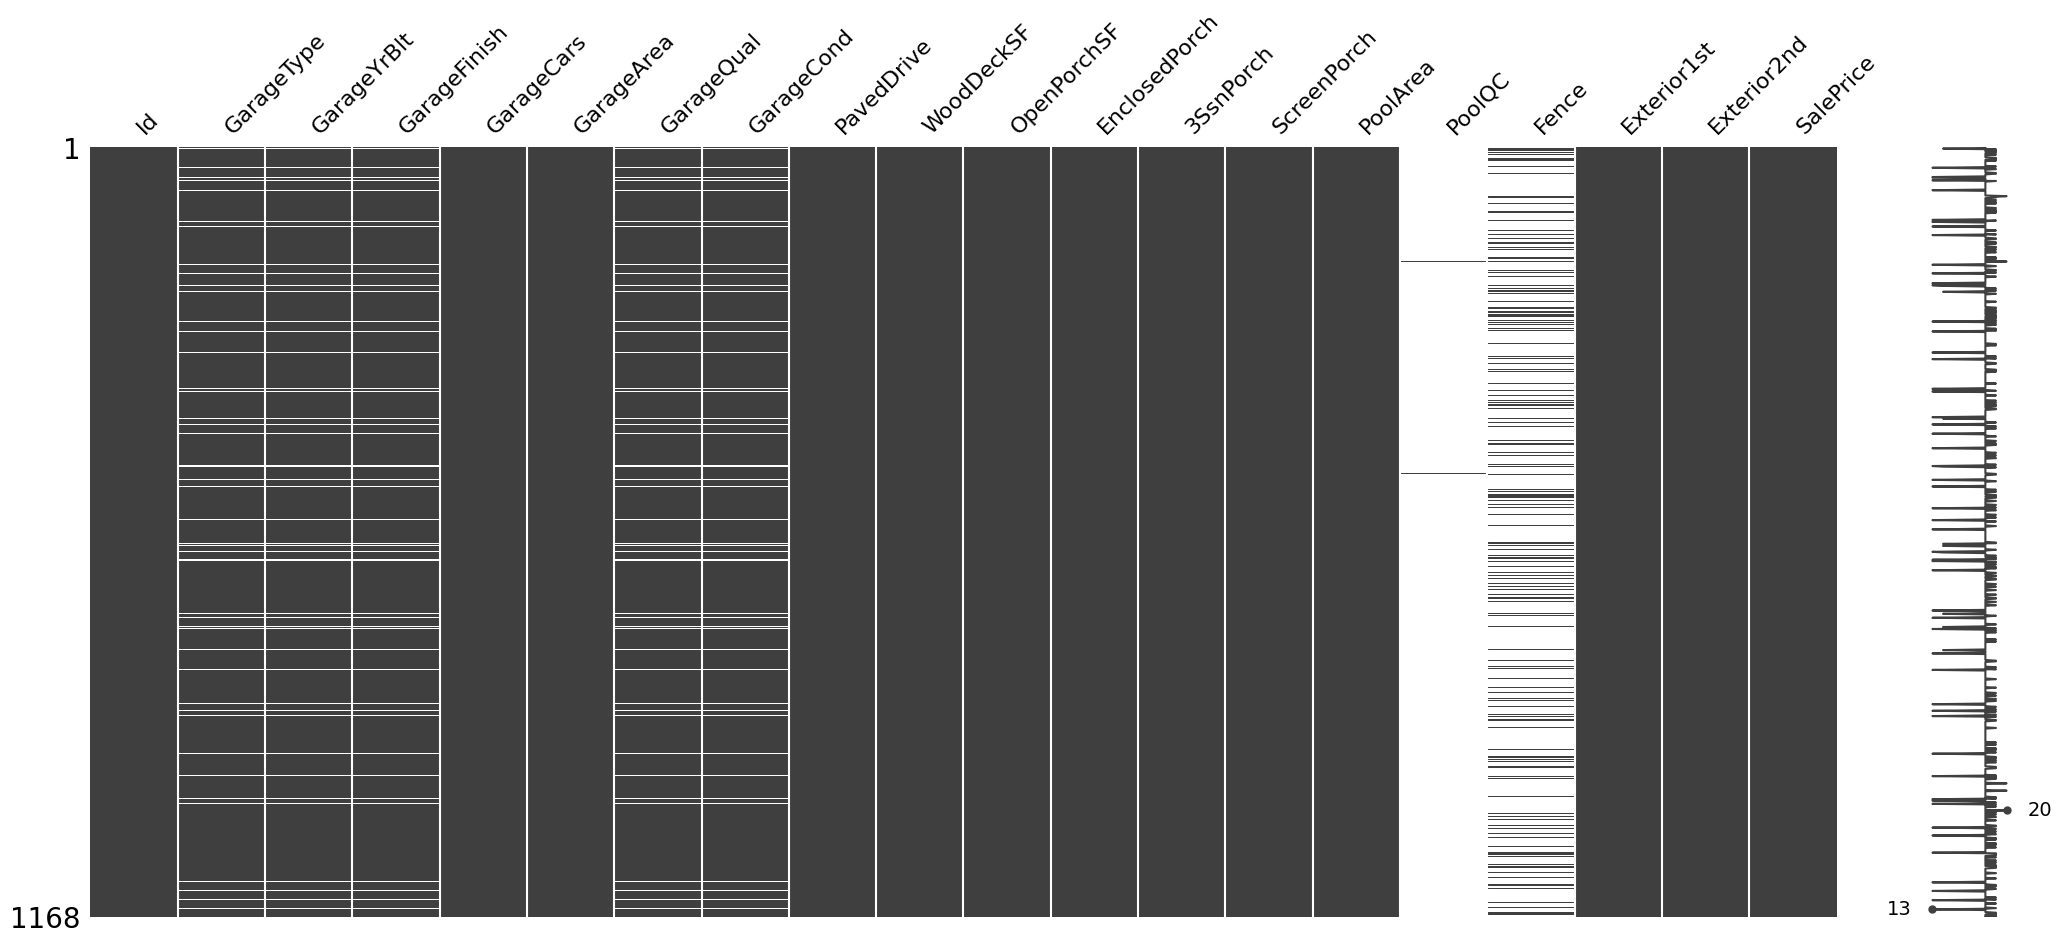

In [76]:
# Visualiser les valeurs manquantes avec missingno
msno.matrix(df_Larry)
plt.show()

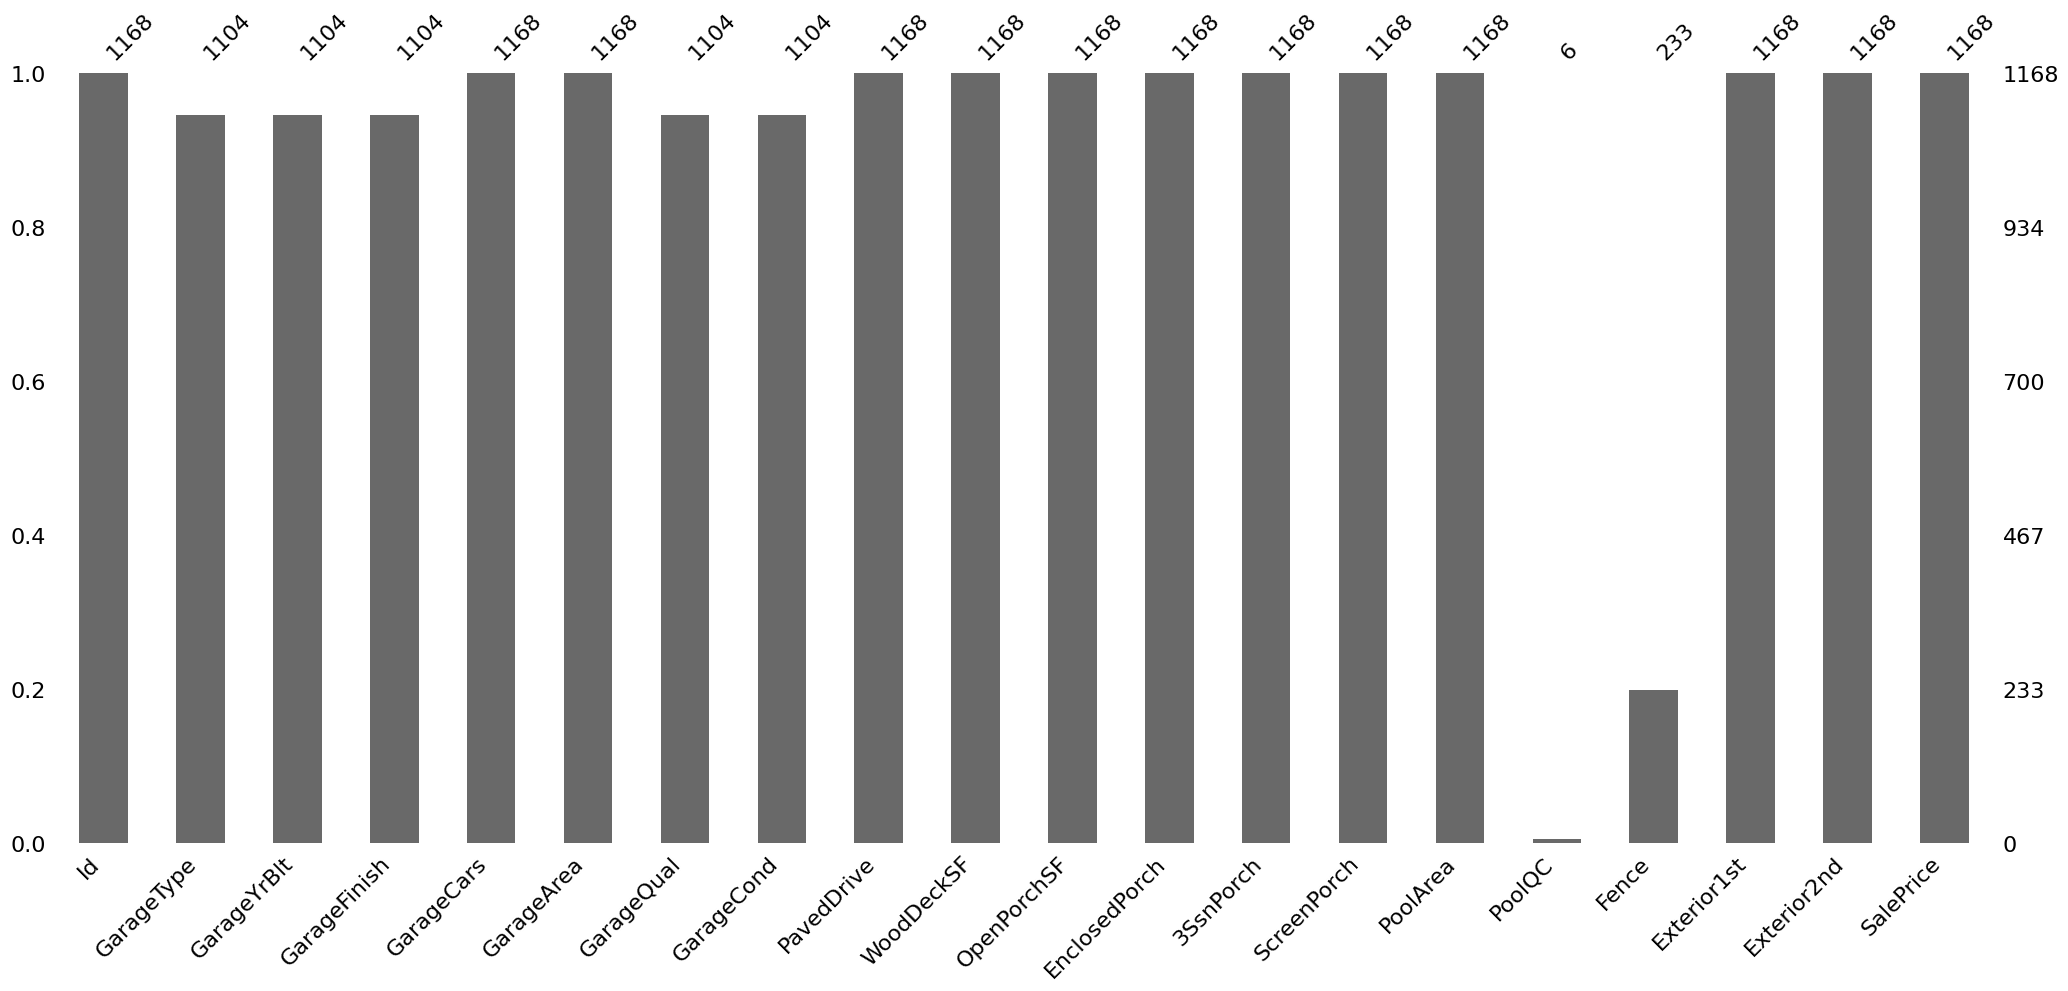

In [77]:
# Graphique des valeurs manquantes
msno.bar(df_Larry)
plt.show()

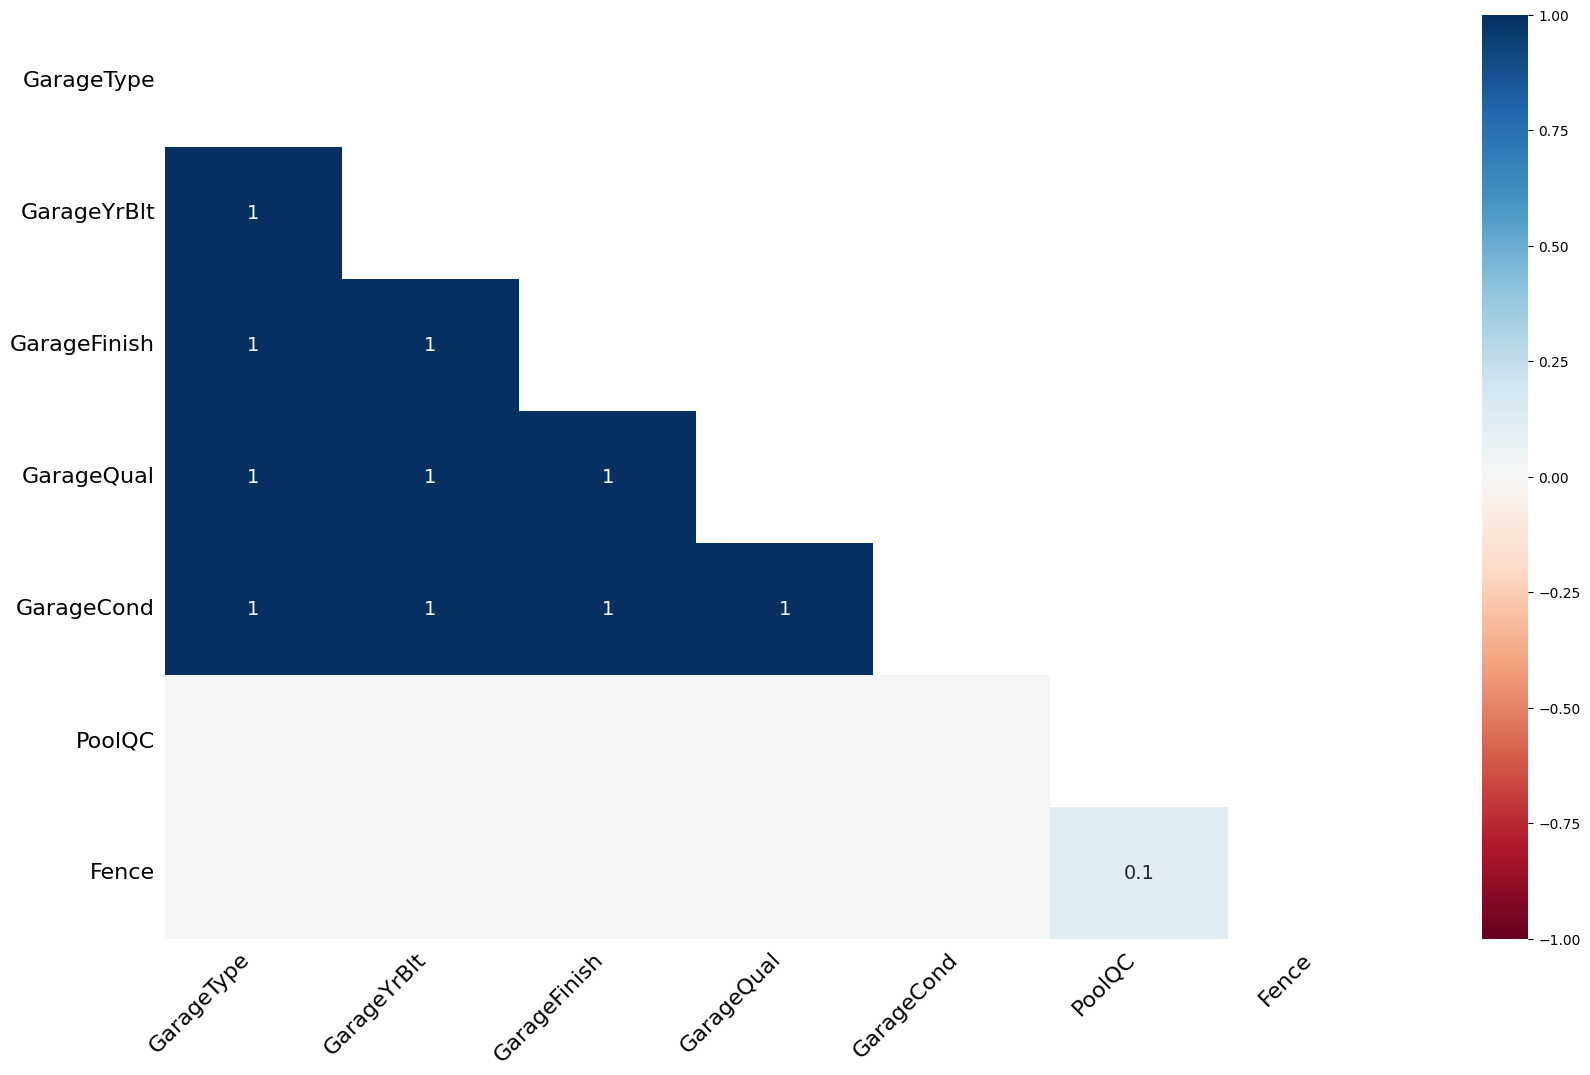

In [78]:
# Correlation des valeurs manquantes
msno.heatmap(df_Larry)
plt.show()

Les valeurs manquantes liees au garage sont toutes liees

In [79]:
# Tableau des valeurs manquantes par colonne

missing_values = df_Larry.isnull().sum()
missing_percent = (missing_values / len(df_Larry)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

               Missing Values  Percentage
Id                          0    0.000000
GarageType                 64    5.479452
GarageYrBlt                64    5.479452
GarageFinish               64    5.479452
GarageCars                  0    0.000000
GarageArea                  0    0.000000
GarageQual                 64    5.479452
GarageCond                 64    5.479452
PavedDrive                  0    0.000000
WoodDeckSF                  0    0.000000
OpenPorchSF                 0    0.000000
EnclosedPorch               0    0.000000
3SsnPorch                   0    0.000000
ScreenPorch                 0    0.000000
PoolArea                    0    0.000000
PoolQC                   1162   99.486301
Fence                     935   80.051370
Exterior1st                 0    0.000000
Exterior2nd                 0    0.000000
SalePrice                   0    0.000000


Variables potentiellement a supprimer : PoolQC et Fence
Car trop de valeurs manquantes

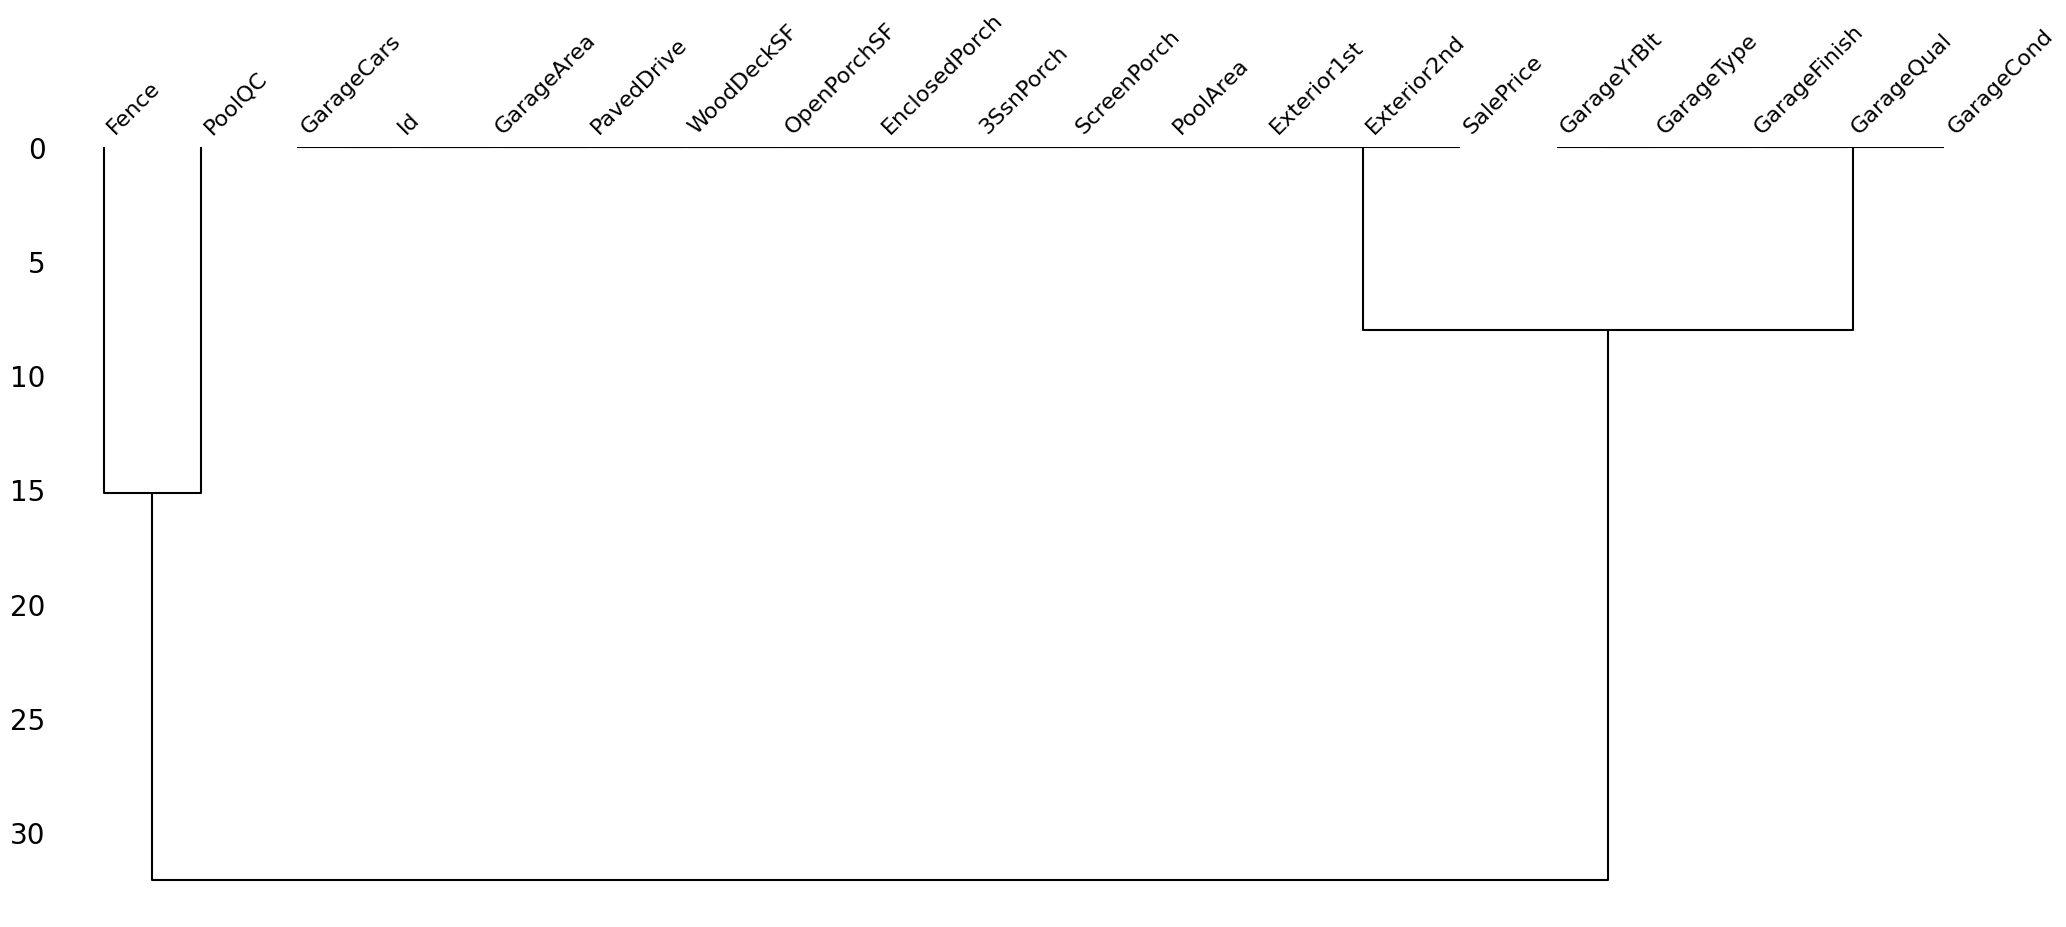

In [80]:
# Visualisation de la corrélation entre les valeurs manquantes

msno.dendrogram(df_Larry)
plt.show()

Apres analyse des variables presentant des valeurs manquantes, on constate que ces leurs manquantes ne sont pas reellement des valeurs manquantes mais cela est plutot du a le NA signifie que la maison concernee ne presente pas la caristeristique choisie. 
Par exemple, la valeur NA pour la variable GarageType signifie que la maison ne possede pas de garage

Pour resoudre ce probleme, nous allons donc juste ajouter une modalite **Not_Exist** pour preciser que cela n'existe juste pas dans cette maison

Cela n'est par contre pas vrai pour la variable GarageYrBlt
Nous allons d'abord la transformer en date

### Transformation de la variable GarageYrBlt

In [81]:
df_Larry["GarageYrBlt"][0]

2003.0

In [82]:
# Transformation de la variable GarageYrBlt en date
df_Larry = df_Larry.copy()
df_Larry.loc[:, 'GarageYrBlt'] = pd.to_numeric(df_Larry['GarageYrBlt'], errors='coerce').astype('Int64')
df_Larry["GarageYrBlt"][0]

2003

### Traitement des valeurs manquantes 

In [83]:
# Extraction les colonnes concernees
columns_with_missing_values = missing_table[missing_table['Percentage'] > 0].index.tolist()

print(columns_with_missing_values)


['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']


#### Traitement des variables Quali

In [84]:
# Remplacons les NA par Not_Exist dans les variables quali

var_quali_missing = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in var_quali_missing:
    df_Larry[col] = df_Larry[col].fillna("No_Garage")
    
df_Larry['PoolQC'] = df_Larry['PoolQC'].fillna("No_Pool")
df_Larry['Fence'] = df_Larry['Fence'].fillna("No_Fence")

df_Larry.head(5)

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,Exterior1st,Exterior2nd,SalePrice
254,255,Attchd,1957,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,No_Pool,No_Fence,MetalSd,MetalSd,145000
1066,1067,Attchd,1993,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,No_Pool,No_Fence,VinylSd,VinylSd,178000
638,639,No_Garage,<NA>,No_Garage,0,0,No_Garage,No_Garage,P,328,0,164,0,0,0,No_Pool,MnPrv,MetalSd,Wd Sdng,85000
799,800,Detchd,1939,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,No_Pool,MnPrv,Wd Sdng,Wd Sdng,175000
380,381,Detchd,1924,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,No_Pool,No_Fence,BrkFace,Wd Sdng,127000


##### Visualisation des variables quali pour une meilleure interpretation

In [85]:
quantitative_variables = df_Larry.select_dtypes(include=['number']).columns.tolist()
qualitative_variables = df_Larry.select_dtypes(exclude=['number']).columns.tolist()
print("Variables quantitatives :", quantitative_variables)
print("Variables qualitatives :", qualitative_variables)

Variables quantitatives : ['Id', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']
Variables qualitatives : ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'Exterior1st', 'Exterior2nd']


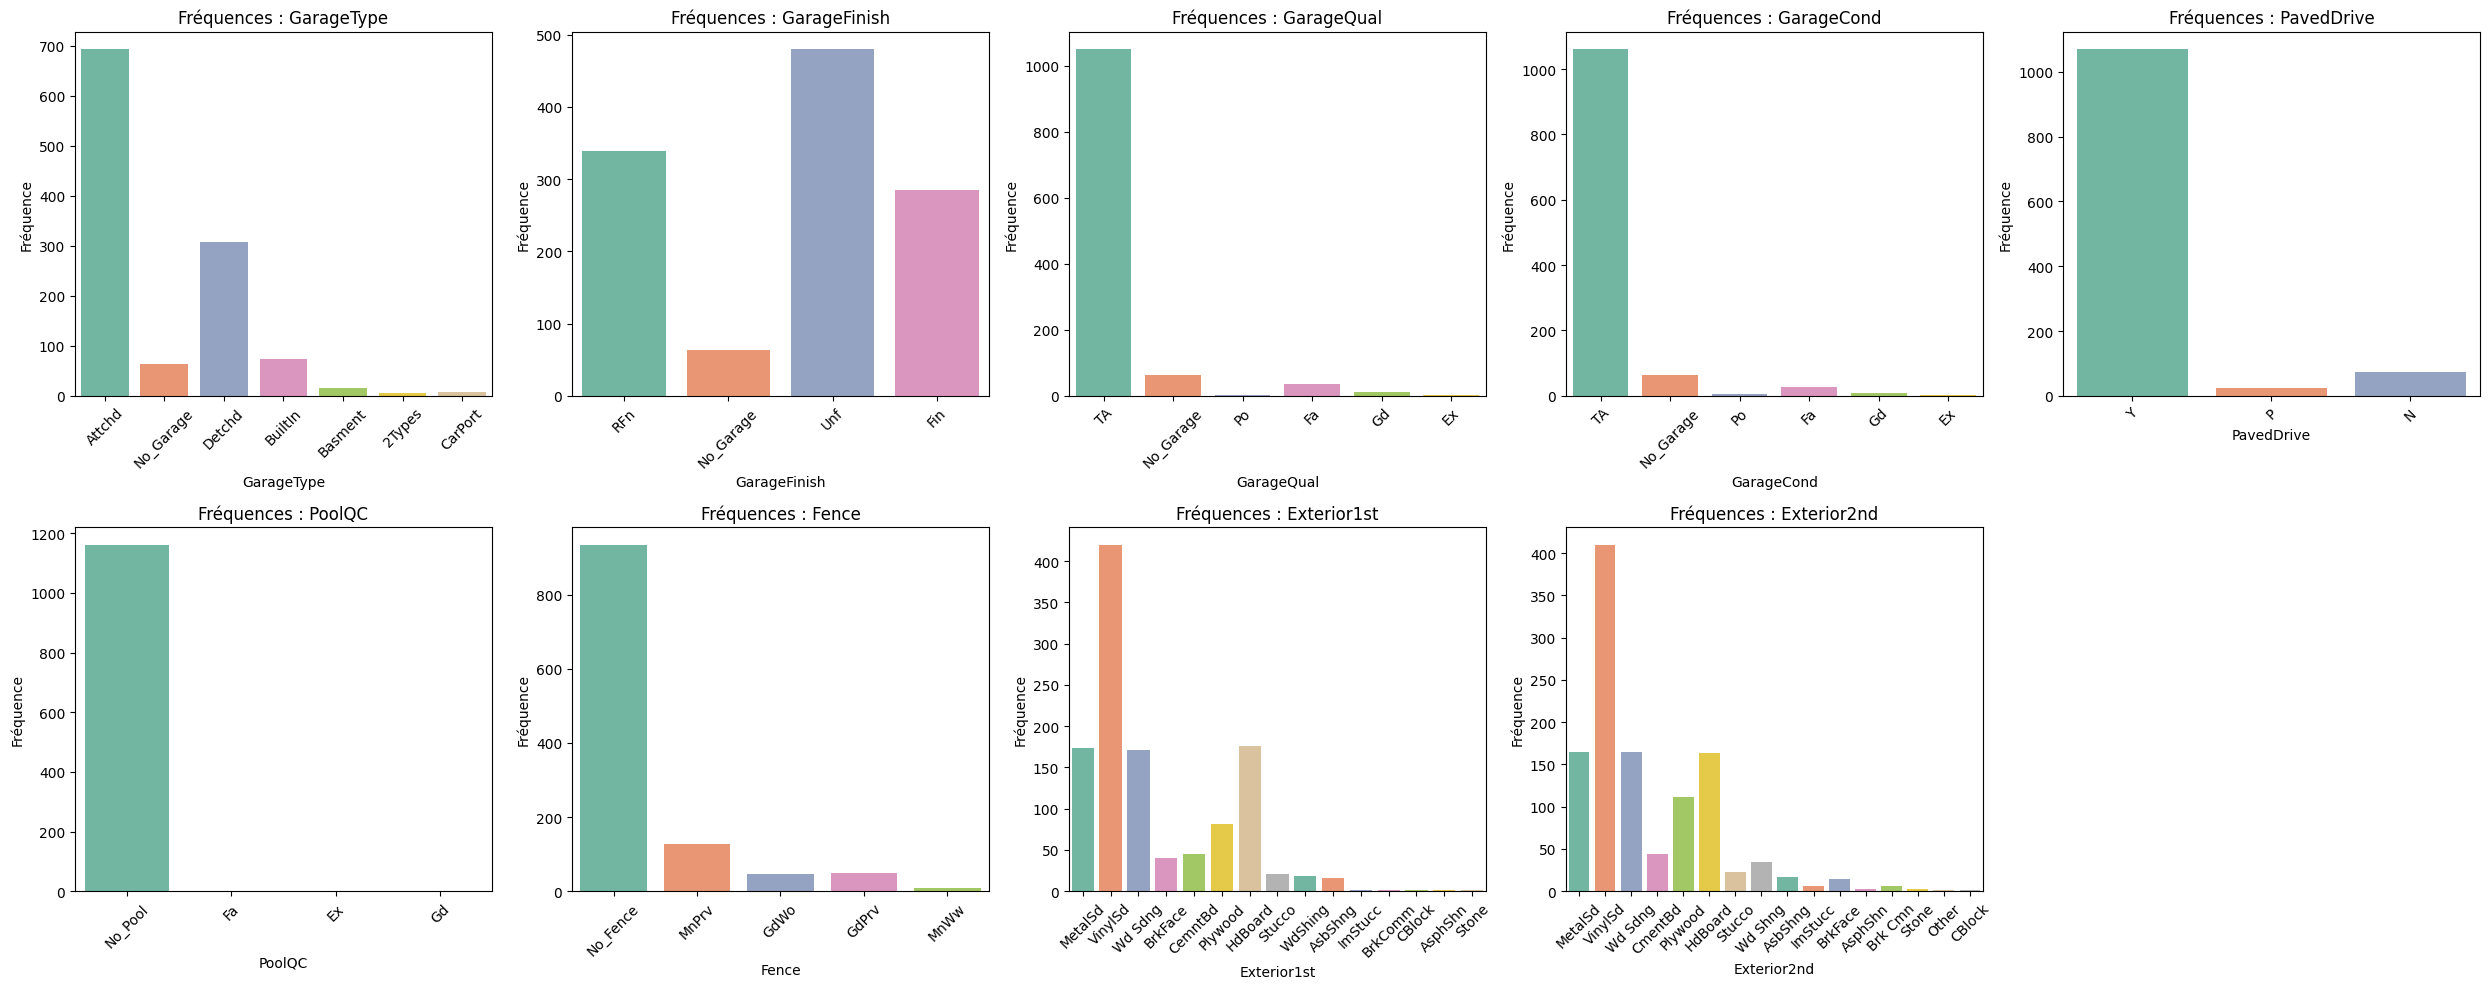

In [86]:
# Visualisation
num_plots = len(qualitative_variables)
    
# Définir un nombre de colonnes pour afficher les graphiques côte à côte
cols = 5  # Vous pouvez ajuster ce nombre selon la largeur de votre fenêtre
rows = (num_plots + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Aplatir la liste des axes pour un accès plus facile

# Créer un barplot pour chaque variable qualitative basé sur la fréquence
for i, var in enumerate(qualitative_variables):
    sns.countplot(data=df_Larry, x=var, hue=var, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f"Fréquences : {var}", fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Fréquence', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si le nombre de variables qualitatives n'est pas un multiple de cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()
plt.show()

On voit directement que les variables telles que : GarageQual, GarageCond, PavedDrive, Fence et surtout PoolQC sont problematiques car elles n'apportent pas vraiment de l'information.
En effet, une modalite est trop presente dans le jeu de donnee

**Suppression de la variable PoolQC**

In [87]:
# Suppression de la variable PoolQC 
df_Larry = df_Larry.drop(columns=["PoolQC"], errors="ignore")
df_Larry.columns

Index(['Id', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Fence', 'Exterior1st', 'Exterior2nd', 'SalePrice'],
      dtype='object')

**NB :** La suppression de la variable PoolQC entraine automatiquement la suppression de la variable PoolArea

Pour les autres variables ['GarageQual', 'GarageCond', 'PavedDrive', 'Fence'], on va voir si les moyennes des prix de SalePrice sont bien differenciees sur les modalites moins representees

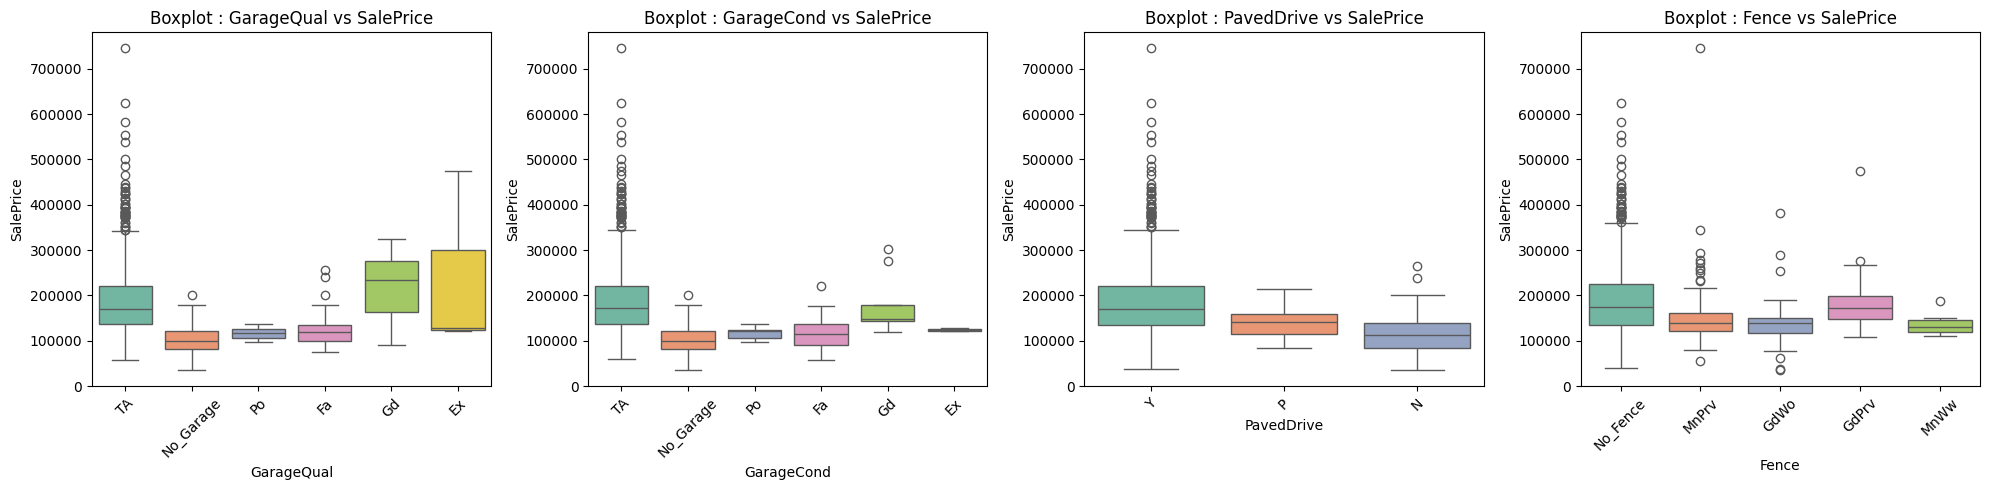

In [88]:
variables_problematiques = ['GarageQual', 'GarageCond', 'PavedDrive', 'Fence']
num_plots = len(variables_problematiques)
    
# Définir un nombre de colonnes pour afficher les graphiques côte à côte
cols = 4  # Vous pouvez ajuster ce nombre selon la largeur de votre fenêtre
rows = (num_plots + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Aplatir la liste des axes pour un accès plus facile

# Créer un boxplot pour chaque variable qualitative
for i, var in enumerate(variables_problematiques):
    sns.boxplot(data=df_Larry, x=var, y='SalePrice', hue=var, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f"Boxplot : {var} vs SalePrice", fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('SalePrice', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si le nombre de variables qualitatives n'est pas un multiple de cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()
plt.show()


**On constate alors que les modalitees moins representees influencent la variable SalePrice**

**FIN DU TRAITEMENT DES VARIABLES QUALI**

#### Traitement des variables quanti

La seule variable qui presente les valeurs manquantes est a variable GarageYrBlt

Les valeurs manquantes dans la variables GarageYrBlt est du au fait que certaines maison n'ont pas de garage
Notre solution sera donc de remplacer ces valeurs par la date actuelle pour faire comme ci le garage 0 annee

In [89]:
# Remplacement des NaN par la date en cours

min_year = df_Larry['GarageYrBlt'].min()
df_Larry['GarageYrBlt'].fillna(min_year, inplace=True)

In [90]:
min_year

1900

##### Visualisation des variables quanti

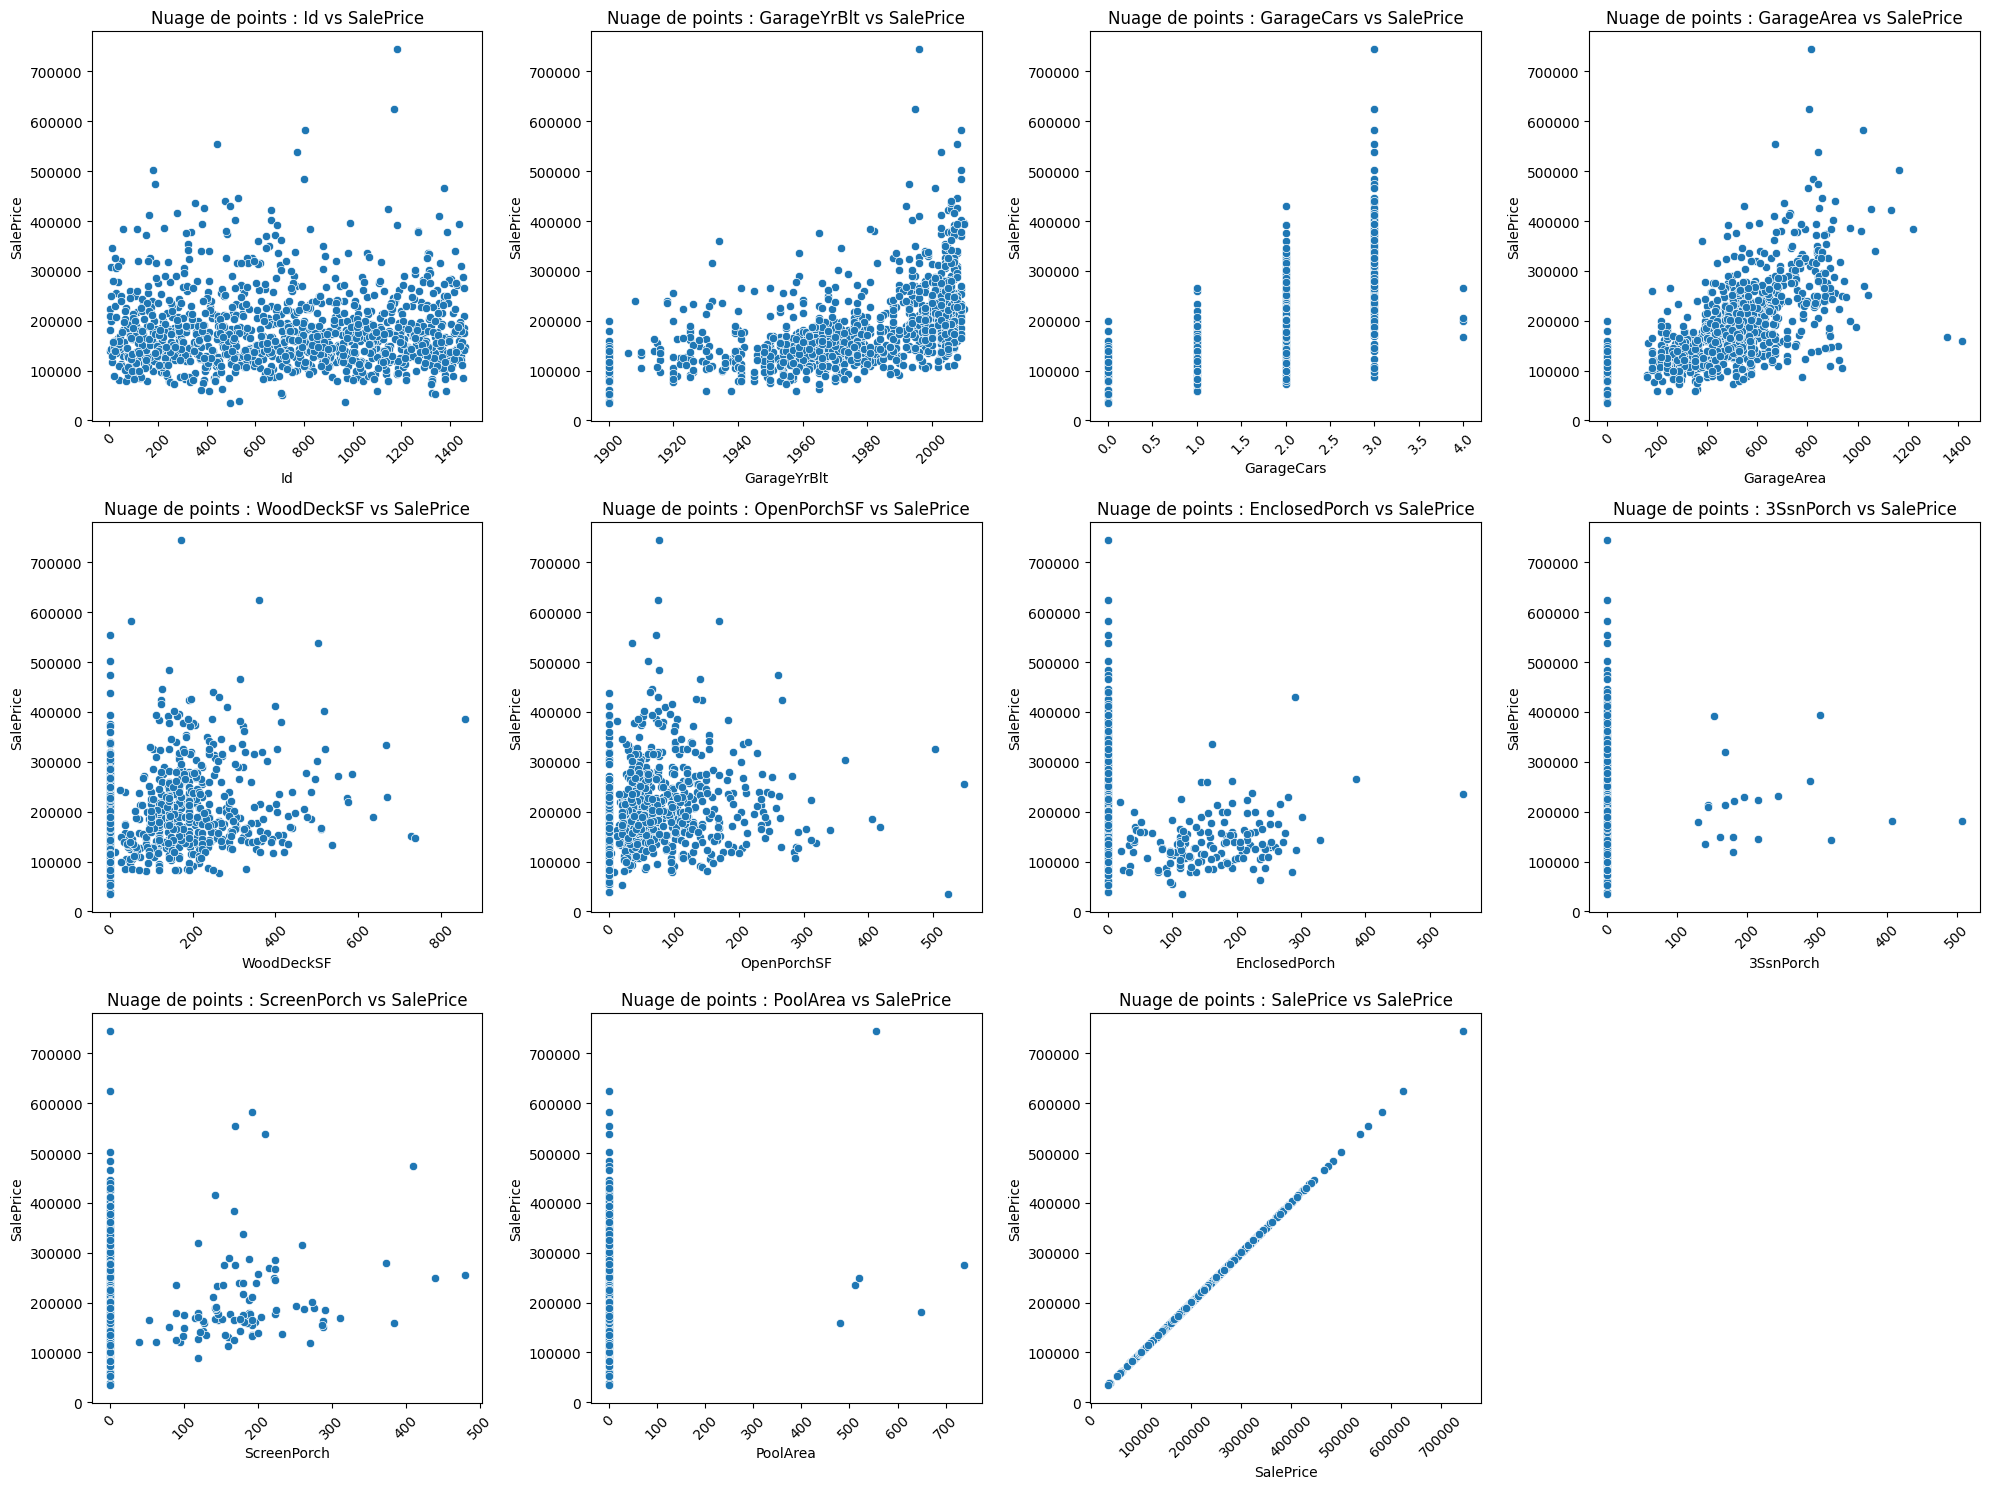

In [91]:
num_plots = len(quantitative_variables)
    
# Définir un nombre de colonnes pour afficher les graphiques côte à côte
cols = 4  # Vous pouvez ajuster ce nombre selon la largeur de votre fenêtre
rows = (num_plots + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()  # Aplatir la liste des axes pour un accès plus facile

# Créer un nuage de points pour chaque variable quantitative
for i, var in enumerate(quantitative_variables):
    sns.scatterplot(data=df_Larry, x=var, y='SalePrice', ax=axes[i])
    axes[i].set_title(f"Nuage de points : {var} vs SalePrice", fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('SalePrice', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si le nombre de variables quantitatives n'est pas un multiple de cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()
plt.show()

Comme on l'avait precise plus haut, la variable PoolArea apporte peu d'information sur la variable 

In [92]:
# Suppression de la variable PoolArea 
df_Larry = df_Larry.drop(columns=["PoolArea"], errors="ignore")
df_Larry.columns

Index(['Id', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence',
       'Exterior1st', 'Exterior2nd', 'SalePrice'],
      dtype='object')

La variable 3SsnPorch semble aussi etre ploblematique

In [93]:
quantitative_variables = df_Larry.select_dtypes(include=['number']).columns.tolist()
qualitative_variables = df_Larry.select_dtypes(exclude=['number']).columns.tolist()
print("Variables quantitatives :", quantitative_variables)
print("Variables qualitatives :", qualitative_variables)

Variables quantitatives : ['Id', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice']
Variables qualitatives : ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'Exterior1st', 'Exterior2nd']


In [94]:
# Parfait

### Traitement des valeurs aberantes

In [95]:
# stats desc des variables quanti 
df_Larry.describe()

,Id,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,730.904966,1974.351884,1.781678,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,181441.541952
std,425.369088,29.978890,0.740161,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,77263.583862
min,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,360.750000,1958.000000,1.000000,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000
50%,732.500000,1978.000000,2.000000,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,165000.000000
75%,1101.750000,2001.000000,2.000000,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,214925.000000
max,1460.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,745000.000000


L'analyse des min et max de nos variables quntitatives nous montre a priori que les valeurs ne sont pas irrealistes.

Text(0.5, 1.0, 'Boxplot de SalePrice')

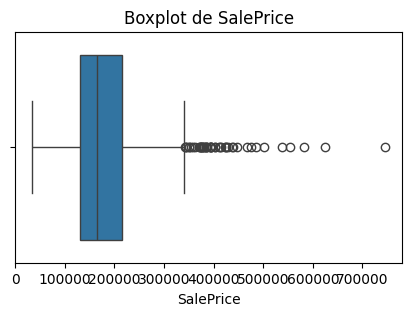

In [96]:
# Analyse de la variable a expliquer
var = 'SalePrice'
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_Larry, x=var)
plt.title(f"Boxplot de {var}")

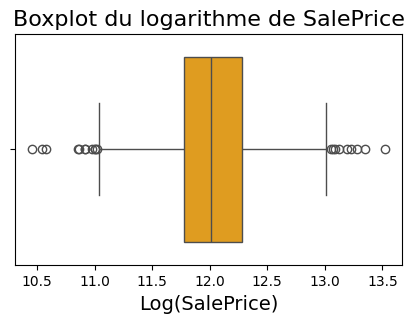

In [97]:
# Boxplot du log
df_Larry['Log_SalePrice'] = np.log(df_Larry['SalePrice'])
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_Larry, x='Log_SalePrice', color='orange')
plt.title("Boxplot du logarithme de SalePrice", fontsize=16)
plt.xlabel("Log(SalePrice)", fontsize=14)
plt.show()

L'analyse de SalePrice nous montre qu'il y a beaucoup d'outliers

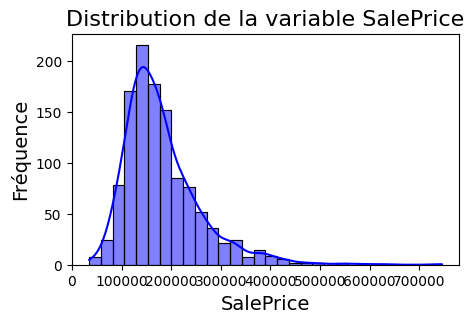

In [98]:
# Distribution de la variable a expliquer

plt.figure(figsize=(5, 3))
sns.histplot(df_Larry['SalePrice'], kde=True, bins=30, color='blue')
plt.title("Distribution de la variable SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.show()

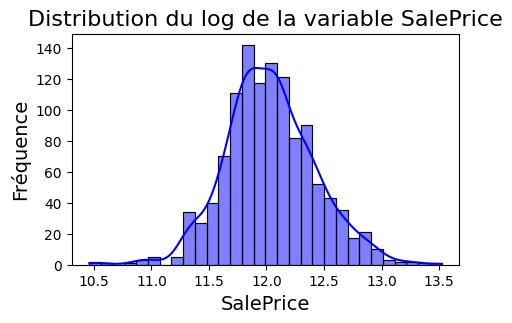

In [99]:
# Distribution du log de la variable a expliquer

plt.figure(figsize=(5, 3))
sns.histplot(np.log(df_Larry['SalePrice']), kde=True, bins=30, color='blue')
plt.title("Distribution du log de la variable SalePrice", fontsize=16)
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.show()

On constate que le log de notre variable a une distribution plus symetrique et que les valeurs aberantes ont ete attenuees

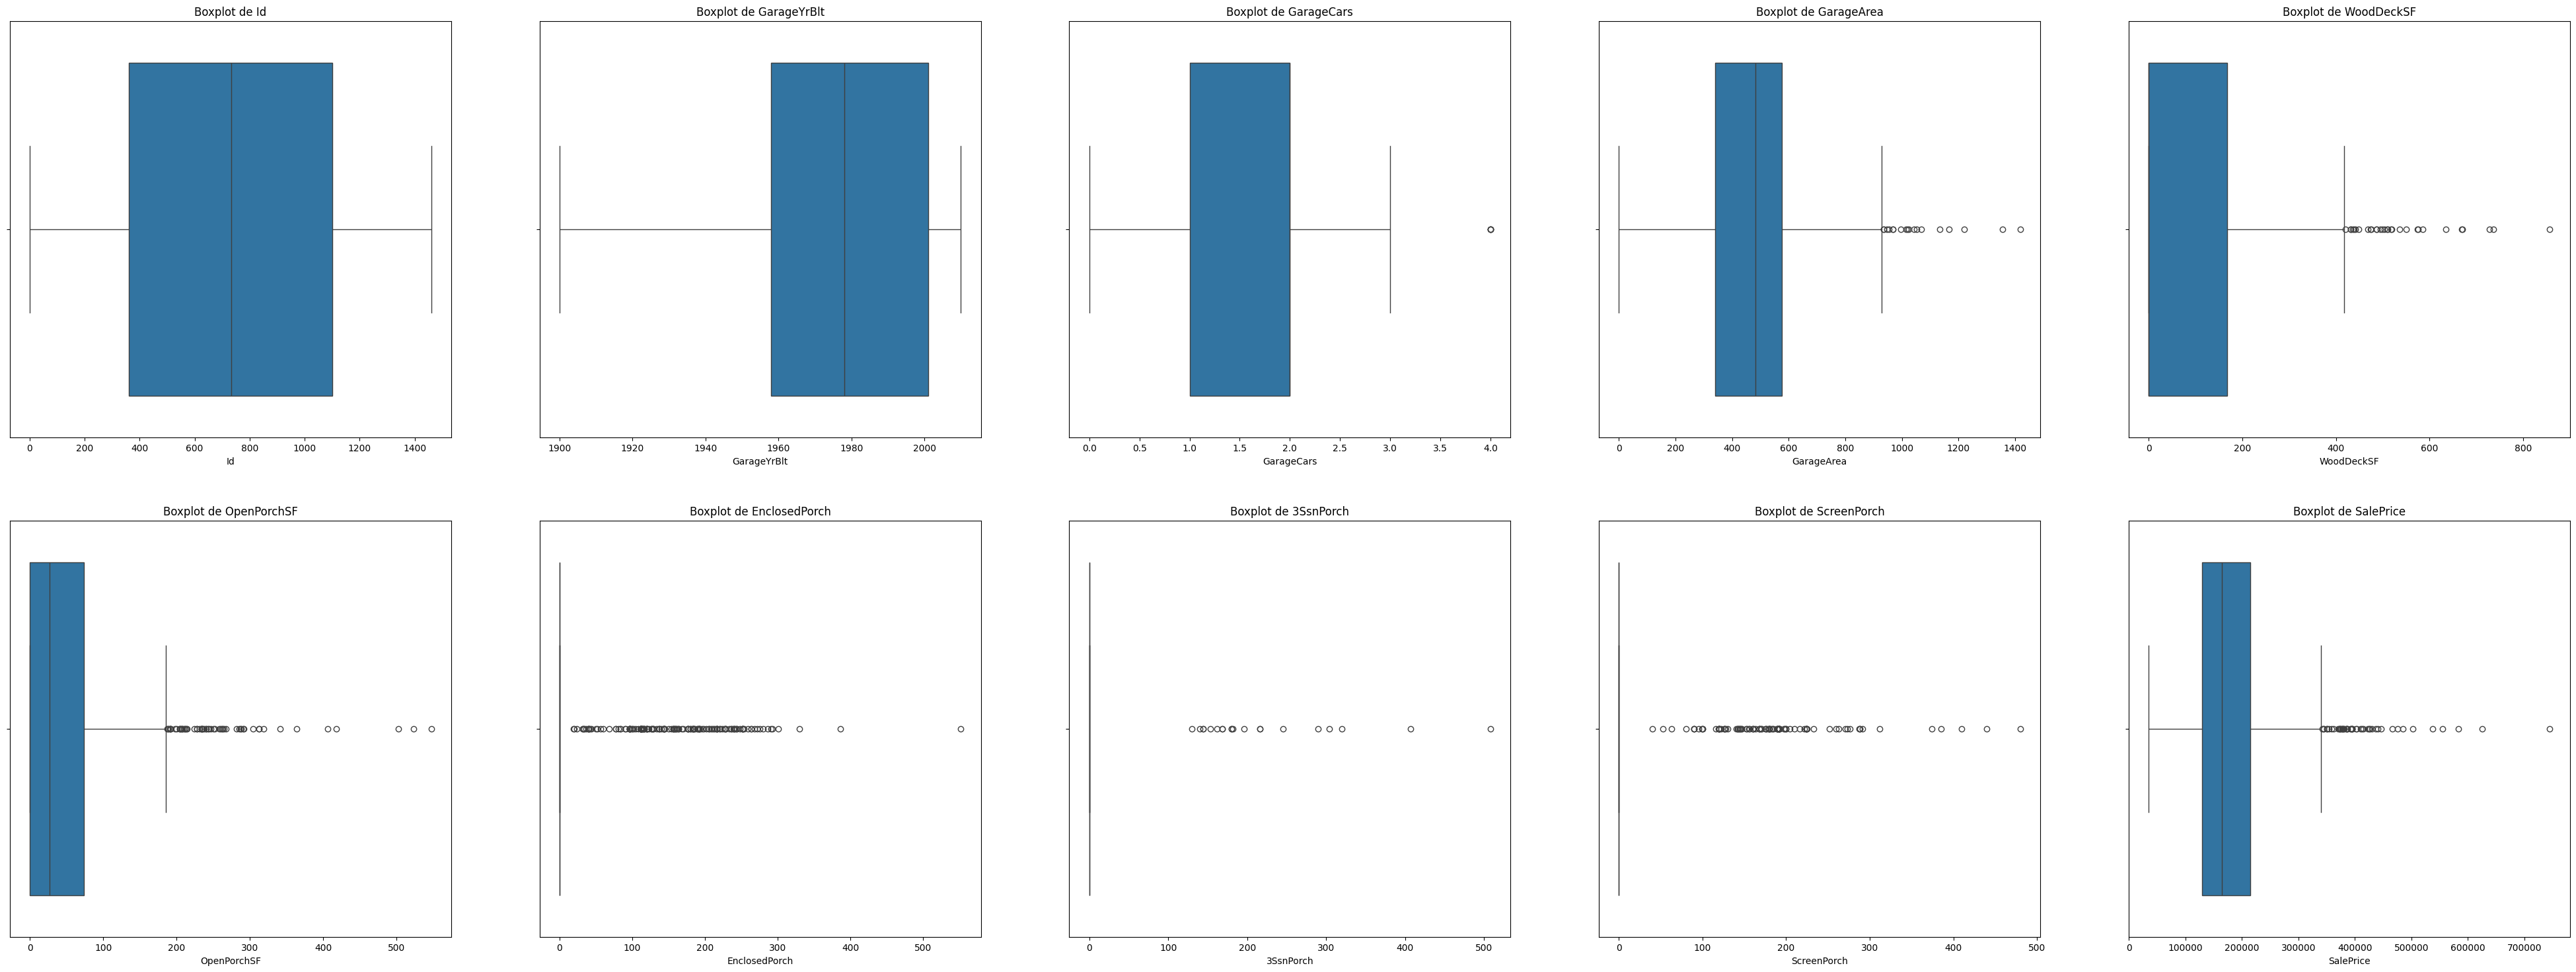

In [100]:
# Boxplots des variables quantitatives 

# Définir le nombre de colonnes pour l'affichage (vous pouvez ajuster selon vos besoins)
n_cols = 5

# Calculer le nombre de lignes nécessaires
n_rows = -(-len(quantitative_variables) // n_cols)  # Division entière en arrondi supérieur

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 9))

# Aplatir les axes si nécessaire (cas de plusieurs lignes/colonnes)
axes = axes.flatten()


# Tracer les boxplots
for i, var in enumerate(quantitative_variables):
    sns.boxplot(data=df_Larry, x=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

# Cacher les axes inutilisés si le nombre de graphiques est inférieur au total d'axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

Les boxpots par contre nous montrent une presence accentuee d'outiers
Essayons de regler cela : On va faire un nuage de point pour chacune de ces variables pour avec la variable cible pour voir si l'aberance dans la variable expliacative cause aussi la meme chose pour la variable cible 

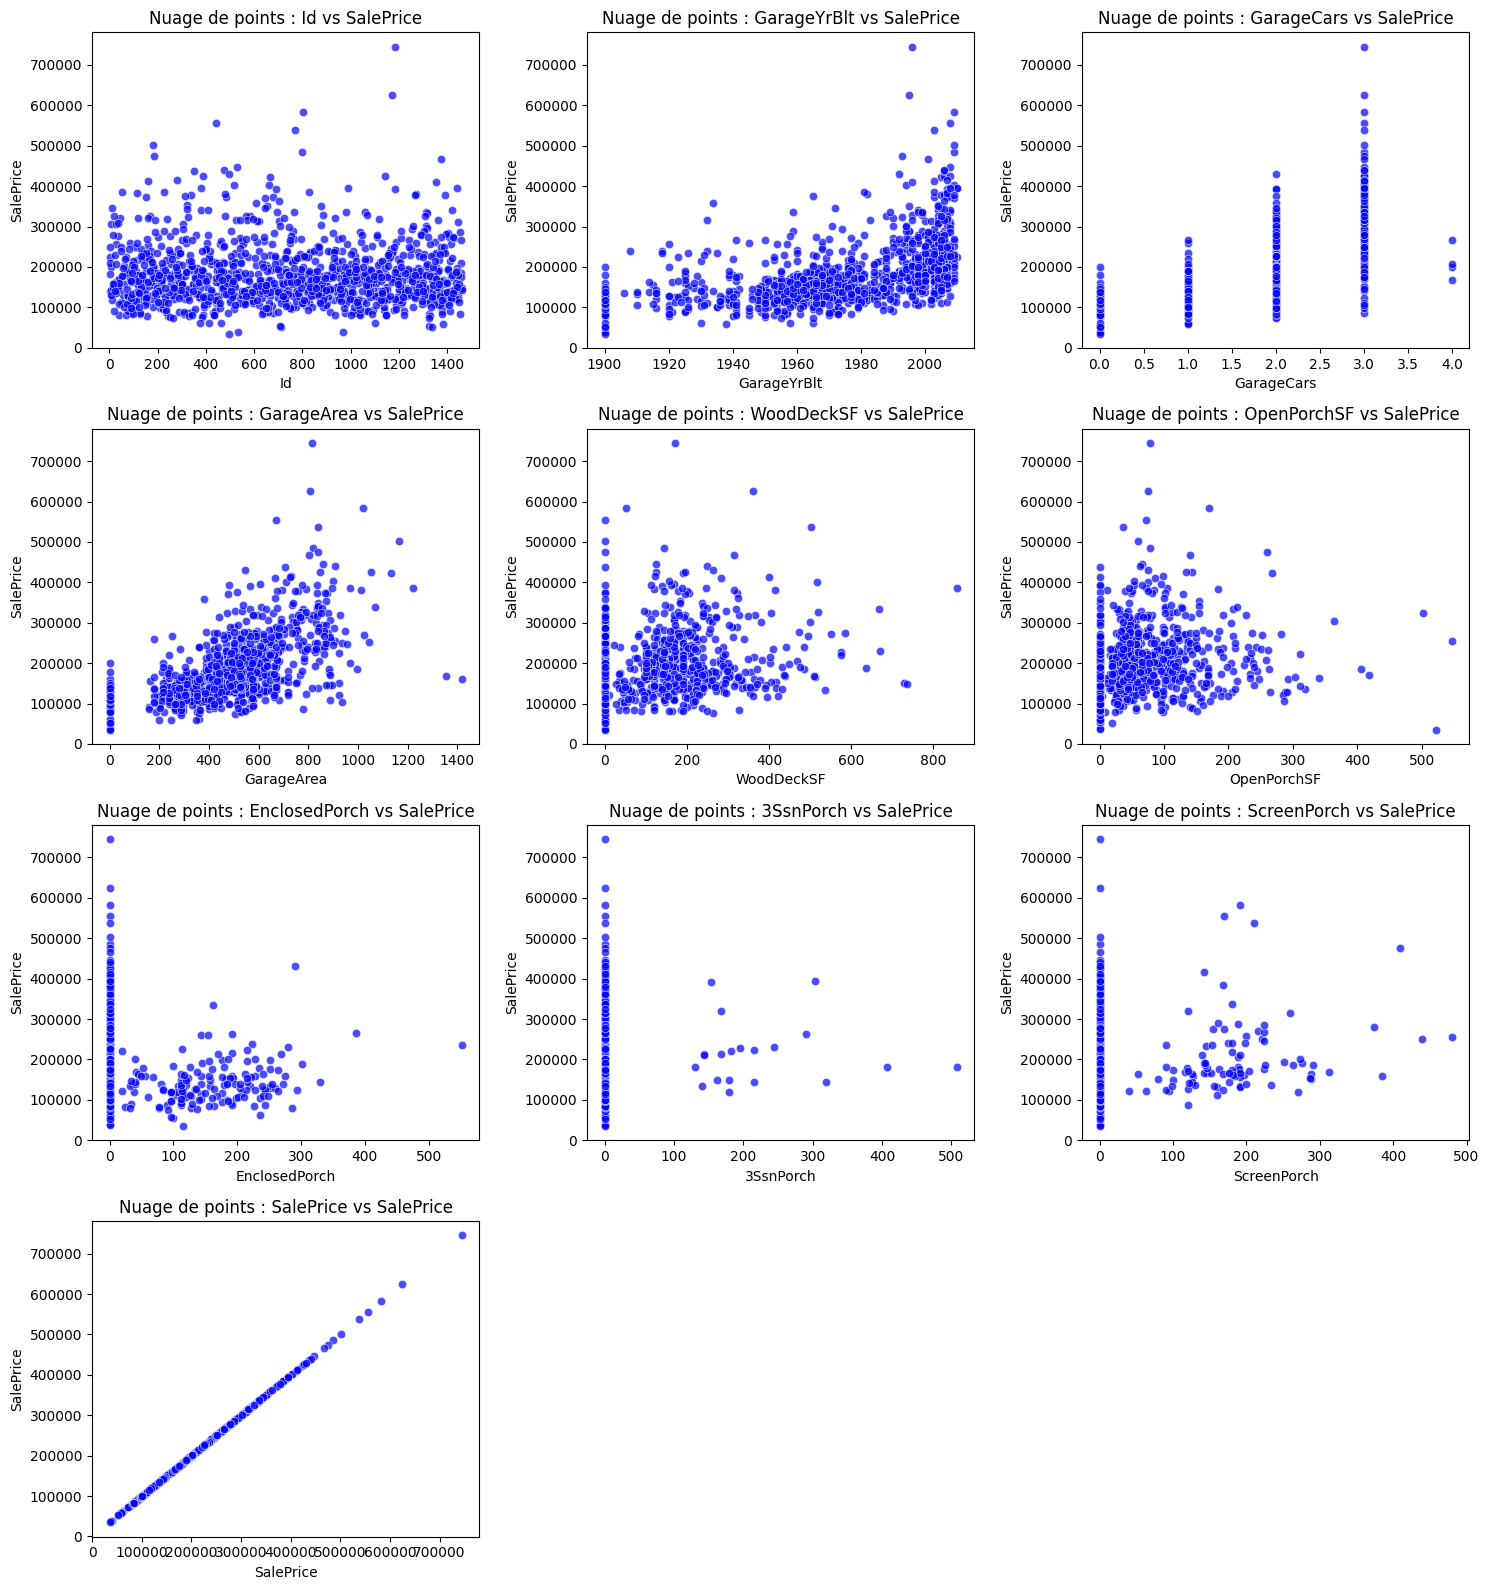

In [101]:
num_plots = len(quantitative_variables)

# Définir un nombre de colonnes pour afficher les graphiques côte à côte
cols = 3  # Ajustez ce nombre selon vos besoins
rows = (num_plots + cols - 1) // cols  # Calcul du nombre de lignes nécessaires

# Créer la figure et les axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Aplatir la liste des axes pour un accès plus facile

# Créer un scatterplot pour chaque variable quantitative
for i, var in enumerate(quantitative_variables):
    sns.scatterplot(data=df_Larry, x=var, y='SalePrice', alpha=0.7, color='blue', ax=axes[i])
    axes[i].set_title(f"Nuage de points : {var} vs SalePrice", fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('SalePrice', fontsize=10)

# Supprimer les axes vides si le nombre de variables quantitatives n'est pas un multiple de cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster la mise en page pour éviter le chevauchement
plt.tight_layout()
plt.show()

Ces variables possedent certes des valeurs extremes mais ce sont des valeurs reelles qui ont leur importance

## Recodage des variables 

Label encoding pour les variables ordinales et One-Shot encoding pour les variables non ordinales

In [102]:
quantitative_variables = df_Larry.select_dtypes(include=['number']).columns.tolist()
qualitative_variables = df_Larry.select_dtypes(exclude=['number']).columns.tolist()
print("Variables quantitatives :", quantitative_variables)
print("Variables qualitatives :", qualitative_variables)

Variables quantitatives : ['Id', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice', 'Log_SalePrice']
Variables qualitatives : ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'Exterior1st', 'Exterior2nd']


### Labels encoding

In [103]:
# Initialiser un dictionnaire pour stocker les modalités
modalities_dict = {}

# Parcourir chaque variable qualitative
for var in qualitative_variables:
    # Extraire les modalités uniques en supprimant les valeurs manquantes
    modalities = df_Larry[var].dropna().unique().tolist()
    
    # Ajouter la liste des modalités dans le dictionnaire avec le nom de la variable comme clé
    modalities_dict[var] = modalities

# Afficher le dictionnaire
print(modalities_dict)


{'GarageType': ['Attchd', 'No_Garage', 'Detchd', 'BuiltIn', 'Basment', '2Types', 'CarPort'], 'GarageFinish': ['RFn', 'No_Garage', 'Unf', 'Fin'], 'GarageQual': ['TA', 'No_Garage', 'Po', 'Fa', 'Gd', 'Ex'], 'GarageCond': ['TA', 'No_Garage', 'Po', 'Fa', 'Gd', 'Ex'], 'PavedDrive': ['Y', 'P', 'N'], 'Fence': ['No_Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], 'Exterior1st': ['MetalSd', 'VinylSd', 'Wd Sdng', 'BrkFace', 'CemntBd', 'Plywood', 'HdBoard', 'Stucco', 'WdShing', 'AsbShng', 'ImStucc', 'BrkComm', 'CBlock', 'AsphShn', 'Stone'], 'Exterior2nd': ['MetalSd', 'VinylSd', 'Wd Sdng', 'CmentBd', 'Plywood', 'HdBoard', 'Stucco', 'Wd Shng', 'AsbShng', 'ImStucc', 'BrkFace', 'AsphShn', 'Brk Cmn', 'Stone', 'Other', 'CBlock']}


In [104]:
# Pour 'GarageFinish'
label_encoding = {'RFn': 2, 'Unf': 1, 'Fin': 3, 'No_Garage': 0}

# Appliquer l'encodage à la variable 'GarageFinish' et la remplacer directement
df_Larry['GarageFinish'] = df_Larry['GarageFinish'].map(label_encoding)

# Afficher les premières lignes pour vérifier le résultat
df_Larry['GarageFinish'].head()

254     2
1066    2
638     0
799     1
380     1
Name: GarageFinish, dtype: int64

In [105]:
# Pour 'GarageQual'

# Dictionnaire de Label Encoding pour la variable 'GarageQual'
label_encoding = {'TA':3, 'Fa':2, 'Gd':4, 'No_Garage': 0, 'Ex':5, 'Po':1}

# Appliquer l'encodage à la variable 'GarageQual' et la remplacer directement
df_Larry['GarageQual'] = df_Larry['GarageQual'].map(label_encoding)

# Afficher les premières lignes pour vérifier le résultat
df_Larry['GarageQual'].head()

254     3
1066    3
638     0
799     3
380     3
Name: GarageQual, dtype: int64

In [106]:
# Pour 'GarageCond'

# Dictionnaire de Label Encoding pour la variable 'GarageCond'
label_encoding = {'TA':3, 'Fa':2, 'Gd':4, 'No_Garage': 0, 'Ex':5, 'Po':1}

# Appliquer l'encodage à la variable 'GarageCond' et la remplacer directement
df_Larry['GarageCond'] = df_Larry['GarageCond'].map(label_encoding)

# Afficher les premières lignes pour vérifier le résultat
df_Larry['GarageCond'].head()

254     3
1066    3
638     0
799     3
380     3
Name: GarageCond, dtype: int64

In [107]:
# Pour 'PavedDrive'

# Dictionnaire de Label Encoding pour la variable 'PavedDrive'
label_encoding = {'Y':3, 'N':1, 'P':2}

# Appliquer l'encodage à la variable 'PavedDrive' et la remplacer directement
df_Larry['PavedDrive'] = df_Larry['PavedDrive'].map(label_encoding)

# Afficher les premières lignes pour vérifier le résultat
df_Larry['PavedDrive'].head()

254     3
1066    3
638     2
799     3
380     3
Name: PavedDrive, dtype: int64

### Frequency encoding

In [108]:
# Dictionnaire des variables pour Frequency Encoding
variables_to_encode = {
    'GarageType': ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No_Garage', 'Basment', '2Types'],
    'Fence': ['No_Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
    'Exterior1st': ['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing', 'CemntBd', 'Plywood',
                    'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'],
    'Exterior2nd': ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng', 'CmentBd', 'BrkFace',
                    'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn', 'Stone', 'Other', 'CBlock']
}

# Appliquer le Frequency Encoding
for var in variables_to_encode.keys():
    if var in df_Larry.columns:  # Vérifier si la variable est présente dans le DataFrame
        # Calcul des fréquences
        freq_encoding = df_Larry[var].value_counts(normalize=True).to_dict()
        # Remplacer les modalités par leur fréquence
        df_Larry[var] = df_Larry[var].map(freq_encoding)

# Afficher les premières lignes pour vérifier le résultat
df_Larry.head()

,Id,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,Exterior1st,Exterior2nd,SalePrice,Log_SalePrice
254,255,0.593322,1957,2,1,294,3,3,3,250,0,0,0,0,0.800514,0.148116,0.141267,145000,11.884489
1066,1067,0.593322,1993,2,2,380,3,3,3,0,40,0,0,0,0.800514,0.359589,0.351027,178000,12.089539
638,639,0.054795,1900,0,0,0,0,0,2,328,0,164,0,0,0.109589,0.148116,0.141267,85000,11.350407
799,800,0.263699,1939,1,1,240,3,3,3,0,0,264,0,0,0.109589,0.146404,0.141267,175000,12.072541
380,381,0.263699,1924,1,1,308,3,3,3,0,0,242,0,0,0.800514,0.034247,0.141267,127000,11.751942


### Transformation de la variable GarageYrBlt (on va prendre le nombre d'annees du garage)

In [134]:
df_Larry['GarageAge'] = df['YrSold'] - df_Larry['GarageYrBlt']
df_Larry['GarageAge']

254      53
1066     16
638     108
799      68
380      86
       ... 
1095      1
1130     28
1294     49
860      82
1126      2
Name: GarageAge, Length: 1168, dtype: Int64

In [135]:
df_Larry = df_Larry.drop(columns=["GarageYrBlt"], errors="ignore")
df_Larry.columns

Index(['Id', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Exterior1st',
       'Exterior2nd', 'SalePrice', 'Log_SalePrice', 'GarageAge'],
      dtype='object')

## ppscore

In [136]:
import ppscore as pps

In [137]:
SEED = 0

In [139]:
pps_predictors = pps.predictors(df=df_Larry.drop(["Id"], axis=1),
                                y='SalePrice', output="df", random_seed=SEED)

In [140]:
pps_predictors

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Log_SalePrice,SalePrice,0.992044,regression,True,mean absolute error,54548.15839,434.010274,DecisionTreeRegressor()
1,GarageCars,SalePrice,0.285472,regression,True,mean absolute error,54548.15839,38976.198878,DecisionTreeRegressor()
2,GarageFinish,SalePrice,0.177948,regression,True,mean absolute error,54548.15839,44841.425854,DecisionTreeRegressor()
3,GarageAge,SalePrice,0.148606,regression,True,mean absolute error,54548.15839,46441.955637,DecisionTreeRegressor()
4,GarageArea,SalePrice,0.143864,regression,True,mean absolute error,54548.15839,46700.645369,DecisionTreeRegressor()
5,GarageType,SalePrice,0.140580,regression,True,mean absolute error,54548.15839,46879.795036,DecisionTreeRegressor()
6,Exterior1st,SalePrice,0.091904,regression,True,mean absolute error,54548.15839,49534.965526,DecisionTreeRegressor()
7,Exterior2nd,SalePrice,0.084015,regression,True,mean absolute error,54548.15839,49965.284805,DecisionTreeRegressor()
8,OpenPorchSF,SalePrice,0.021082,regression,True,mean absolute error,54548.15839,53398.168757,DecisionTreeRegressor()
9,GarageCond,SalePrice,0.019714,regression,True,mean absolute error,54548.15839,53472.822191,DecisionTreeRegressor()


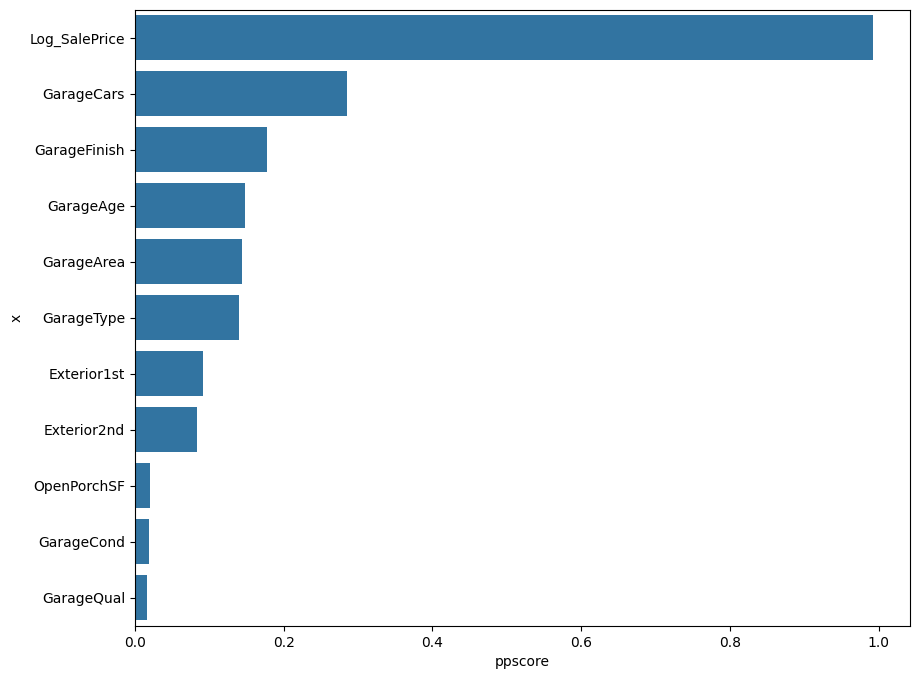

In [141]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=pps_predictors.loc[lambda df_Larry: df_Larry.ppscore > 0], y="x", x="ppscore", orient="h")

La variable Fence n'a pas un pouvoir predictif important; suppression

### Suppresion de la variable Fence

In [142]:
df_Larry = df_Larry.drop(columns=["Fence"], errors="ignore")
df_Larry.columns

Index(['Id', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Exterior1st',
       'Exterior2nd', 'SalePrice', 'Log_SalePrice', 'GarageAge'],
      dtype='object')

In [145]:
df_Larry = df_Larry.drop(columns=["Log_SalePrice"], errors="ignore")
df_Larry.columns

Index(['Id', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Exterior1st',
       'Exterior2nd', 'SalePrice', 'GarageAge'],
      dtype='object')

In [146]:
df_Larry.head(10)

,Id,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Exterior1st,Exterior2nd,SalePrice,GarageAge
254,255,0.593322,2,1,294,3,3,3,250,0,0,0,0,0.148116,0.141267,145000,53
1066,1067,0.593322,2,2,380,3,3,3,0,40,0,0,0,0.359589,0.351027,178000,16
638,639,0.054795,0,0,0,0,0,2,328,0,164,0,0,0.148116,0.141267,85000,108
799,800,0.263699,1,1,240,3,3,3,0,0,264,0,0,0.146404,0.141267,175000,68
380,381,0.263699,1,1,308,3,3,3,0,0,242,0,0,0.034247,0.141267,127000,86
303,304,0.593322,1,2,552,3,3,3,256,0,0,0,0,0.359589,0.351027,149900,31
86,87,0.063356,3,2,400,3,3,3,100,38,0,0,0,0.359589,0.351027,174000,4
1385,1386,0.263699,1,1,240,3,3,1,0,96,0,0,0,0.359589,0.351027,125500,88
265,266,0.593322,3,2,576,3,3,3,276,0,0,0,0,0.148116,0.141267,175500,27
793,794,0.593322,3,2,474,3,3,3,168,130,0,0,0,0.038527,0.037671,225000,0


In [147]:
df_Larry.to_csv("data_car_Larry.csv")

OK